In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model, decomposition, discriminant_analysis, manifold
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV, RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from pycaret.regression import *
import math
import xgboost as xgb

sns.set_theme(style="whitegrid")
%matplotlib inline

C:\Users\bencg\anaconda3\lib\site-packages\dask\dataframe\utils.py:369: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
C:\Users\bencg\anaconda3\lib\site-packages\dask\dataframe\utils.py:369: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
C:\Users\bencg\anaconda3\lib\site-packages\dask\dataframe\utils.py:369: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)


In [2]:
# Read training CSV
PATH = './'
df = pd.read_csv(PATH+"training_data.csv")

In [3]:
# for column in df.columns:
#     print(column)
#     print(df[column].unique())
#     print(df[column].nunique())
#     print()

In [4]:
df.head()

,PolicyNo,Policy_Company,Policy_Installment_Term,Policy_Billing_Code,Policy_Method_Of_Payment,Policy_Reinstatement_Fee_Indicator,Policy_Zip_Code_Garaging_Location,Vehicle_Territory,Vehicle_Make_Year,Vehicle_Make_Description,Vehicle_Performance,Vehicle_New_Cost_Amount,Vehicle_Symbol,Vehicle_Number_Of_Drivers_Assigned,Vehicle_Usage,Vehicle_Miles_To_Work,Vehicle_Days_Per_Week_Driven,Vehicle_Annual_Miles,Vehicle_Anti_Theft_Device,Vehicle_Passive_Restraint,Vehicle_Age_In_Years,Vehicle_Med_Pay_Limit,Vehicle_Bodily_Injury_Limit,Vehicle_Physical_Damage_Limit,Vehicle_Comprehensive_Coverage_Indicator,Vehicle_Comprehensive_Coverage_Limit,Vehicle_Collision_Coverage_Indicator,Vehicle_Collision_Coverage_Deductible,Driver_Total,Driver_Total_Male,Driver_Total_Female,Driver_Total_Single,Driver_Total_Married,Driver_Total_Related_To_Insured_Self,Driver_Total_Related_To_Insured_Spouse,Driver_Total_Related_To_Insured_Child,Driver_Total_Licensed_In_State,Driver_Minimum_Age,Driver_Maximum_Age,Driver_Total_Teenager_Age_15_19,Driver_Total_College_Ages_20_23,Driver_Total_Young_Adult_Ages_24_29,Driver_Total_Low_Middle_Adult_Ages_30_39,Driver_Total_Middle_Adult_Ages_40_49,Driver_Total_Adult_Ages_50_64,Driver_Total_Senior_Ages_65_69,Driver_Total_Upper_Senior_Ages_70_plus,Vehicle_Youthful_Driver_Indicator,Vehicle_Youthful_Driver_Training_Code,Vehicle_Youthful_Good_Student_Code,Vehicle_Driver_Points,Vehicle_Safe_Driver_Discount_Indicator,EEA_Liability_Coverage_Only_Indicator,EEA_Multi_Auto_Policies_Indicator,EEA_Policy_Zip_Code_3,EEA_Policy_Tenure,EEA_Agency_Type,EEA_Packaged_Policy_Indicator,EEA_Full_Coverage_Indicator,EEA_Prior_Bodily_Injury_Limit,EEA_PolicyYear,SYS_Renewed,SYS_New_Business,Annual_Premium,Claim_Count,Loss_Amount,Frequency,Severity,Loss_Ratio
0,164532941,Standard,6,Direct Billed to Insured,Pre-paid,N,43046,35,2004,BUIK LESABRE LI,Standard,-1,11,1,Farm,-1,5,Unknown,Not Applicable,Y,3,1000,250-500,100000,N,-1,Y,500,1,0,1,0,0,1,0,0,1,75,75,0,0,0,0,0,0,0,1,N,Not Applicable,Not Eligible for Good Student Credit,0,Y,N,N,430,22.7,Standard,N,Y,100-400,2006,Y,N,320.12,0,0.0,0.0,0.0,0.0
1,164533241,Standard,6,Direct Billed to Insured,Pre-paid,N,Unknown,35,1980,CADILLAC 4-DOOR,Standard,-1,11,1,Farm,-1,5,Unknown,Not Applicable,N,9,2000,100-300,50000,N,-1,Y,50,1,0,1,0,1,0,0,0,1,71,71,0,0,0,0,0,0,0,1,N,Not Applicable,Not Eligible for Good Student Credit,0,Y,N,N,Unknown,47.1,Preferred,N,Y,100-200,2006,Y,N,259.70,0,0.0,0.0,0.0,0.0
2,164534633,Standard,6,Direct Billed to Insured,Pre-paid,N,43555,17,2005,PONT MONTANA SV,Standard,-1,10,1,Pleasure,-1,5,Unknown,Passive Disabling-Vehicle Recovery,Y,2,50000,250-500,100000,N,-1,Y,100,1,1,0,0,1,1,0,0,1,80,80,0,0,0,0,0,0,0,1,N,Not Applicable,Not Eligible for Good Student Credit,0,Y,N,N,435,47.2,Non-standard,N,Y,100-400,2006,Y,N,613.74,0,0.0,0.0,0.0,0.0
3,164534839,Standard,6,Direct Billed to Insured,Pre-paid,N,43561,17,2005,MERC GRAND MARQ,Standard,-1,12,1,Pleasure,-1,5,Unknown,Passive Disabling-Vehicle Recovery,Y,2,5000,50-100,35000,N,-1,Y,250,1,1,0,0,1,1,0,0,1,74,74,0,0,0,0,0,0,0,1,N,Not Applicable,Not Eligible for Good Student Credit,0,Y,N,Y,435,46.7,Non-standard,Y,Y,40-100,2006,Y,N,541.66,0,0.0,0.0,0.0,0.0
4,164534840,Standard,6,Direct Billed to Insured,Pre-paid,N,43561,17,2005,MERC GRAND MARQ,Standard,-1,12,1,Pleasure,-1,5,Unknown,Passive Disabling-Vehicle Recovery,Y,2,5000,50-100,35000,N,-1,Y,250,1,1,0,0,1,1,0,0,1,75,75,0,0,0,0,0,0,0,1,N,Not Applicable,Not Eligible for Good Student Credit,0,Y,N,Y,435,47.2,Non-standard,Y,Y,40-100,2006,Y,N,541.66,0,0.0,0.0,0.0,0.0


In [5]:
# Data stats
df.describe()

,PolicyNo,Policy_Installment_Term,Vehicle_Territory,Vehicle_Make_Year,Vehicle_New_Cost_Amount,Vehicle_Symbol,Vehicle_Number_Of_Drivers_Assigned,Vehicle_Miles_To_Work,Vehicle_Days_Per_Week_Driven,Vehicle_Age_In_Years,Vehicle_Med_Pay_Limit,Vehicle_Physical_Damage_Limit,Vehicle_Comprehensive_Coverage_Limit,Vehicle_Collision_Coverage_Deductible,Driver_Total,Driver_Total_Male,Driver_Total_Female,Driver_Total_Single,Driver_Total_Married,Driver_Total_Related_To_Insured_Self,Driver_Total_Related_To_Insured_Spouse,Driver_Total_Related_To_Insured_Child,Driver_Total_Licensed_In_State,Driver_Minimum_Age,Driver_Maximum_Age,Driver_Total_Teenager_Age_15_19,Driver_Total_College_Ages_20_23,Driver_Total_Young_Adult_Ages_24_29,Driver_Total_Low_Middle_Adult_Ages_30_39,Driver_Total_Middle_Adult_Ages_40_49,Driver_Total_Adult_Ages_50_64,Driver_Total_Senior_Ages_65_69,Driver_Total_Upper_Senior_Ages_70_plus,Vehicle_Driver_Points,EEA_Policy_Tenure,EEA_PolicyYear,Annual_Premium,Claim_Count,Loss_Amount,Frequency,Severity,Loss_Ratio
count,4.244310e+05,424431.000000,424431.000000,424431.000000,424431.000000,424431.000000,424431.000000,424431.000000,424431.000000,424431.000000,424431.000000,424431.000000,424431.000000,424431.000000,424431.000000,424431.000000,424431.000000,424431.000000,424431.000000,424431.000000,424431.000000,424431.000000,424431.000000,424431.000000,424431.000000,424431.000000,424431.000000,424431.000000,424431.000000,424431.000000,424431.000000,424431.000000,424431.000000,424431.000000,424431.000000,424431.0,424431.000000,424431.000000,4.244310e+05,424431.000000,4.244310e+05,424431.000000
mean,3.144874e+08,6.224701,31.051629,1996.753482,290.333958,11.192347,28.397318,3.302400,4.998798,7.037130,2787.138772,48008.893464,5939.581496,295.771855,1.117753,0.537301,0.580452,0.241705,0.697402,0.769767,0.252032,0.074837,1.113451,46.225443,47.265909,0.040570,0.045626,0.087381,0.212044,0.266067,0.308166,0.061445,0.096454,0.119765,5.886341,2006.0,335.354228,0.046893,2.354292e+02,0.115018,2.267193e+02,1.154623
std,5.776142e+07,1.139174,4.186688,7.388605,2876.619060,4.007123,43.952581,7.698294,0.080719,2.576152,6182.910179,37280.726478,39558.292839,277.263064,0.322652,0.510483,0.511532,0.440143,0.621779,0.422541,0.435118,0.265144,0.328198,15.957944,15.663762,0.198849,0.214056,0.298739,0.439477,0.470372,0.501503,0.249073,0.314316,0.383814,6.646432,0.0,206.291385,0.223597,3.399225e+03,1.636176,3.337804e+03,55.153868
min,1.645329e+08,6.000000,13.000000,1924.000000,-1.000000,-1.000000,1.000000,-1.000000,-1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,2006.0,0.540000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,2.832442e+08,6.000000,30.000000,1993.000000,-1.000000,8.000000,1.000000,-1.000000,5.000000,5.000000,1000.000000,25000.000000,-1.000000,-1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,34.000000,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.200000,2006.0,157.940000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
50%,3.326177e+08,6.000000,31.000000,1998.000000,-1.000000,11.000000,1.000000,-1.000000,5.000000,9.000000,1000.000000,50000.000000,-1.000000,250.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,46.000000,47.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.500000,2006.0,328.580000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
75%,3.612798e+08,6.000000,35.000000,2002.000000,-1.000000,14.000000,99.000000,6.000000,5.000000,9.000000,5000.000000,50000.000000,-1.000000,500.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,57.000000,58.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,8.30

# Data Preparation

In [6]:
# Check which columns have missing rows
df.isna().any().head(42)

PolicyNo                                    False
Policy_Company                              False
Policy_Installment_Term                     False
Policy_Billing_Code                         False
Policy_Method_Of_Payment                    False
Policy_Reinstatement_Fee_Indicator          False
Policy_Zip_Code_Garaging_Location           False
Vehicle_Territory                           False
Vehicle_Make_Year                           False
Vehicle_Make_Description                    False
Vehicle_Performance                         False
Vehicle_New_Cost_Amount                     False
Vehicle_Symbol                              False
Vehicle_Number_Of_Drivers_Assigned          False
Vehicle_Usage                               False
Vehicle_Miles_To_Work                       False
Vehicle_Days_Per_Week_Driven                False
Vehicle_Annual_Miles                        False
Vehicle_Anti_Theft_Device                   False
Vehicle_Passive_Restraint                   False


In [7]:
# 17,326 NaN values in Vehicle_Bodily_Injury_Limit
df[df['Vehicle_Bodily_Injury_Limit'].isnull() == True]['Vehicle_Bodily_Injury_Limit']

6         NaN
33        NaN
140       NaN
170       NaN
205       NaN
         ... 
424384    NaN
424417    NaN
424421    NaN
424426    NaN
424430    NaN
Name: Vehicle_Bodily_Injury_Limit, Length: 17326, dtype: object

<AxesSubplot:xlabel='Loss_Amount'>

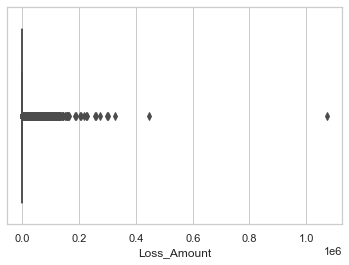

In [8]:
# Outliers found in Loss Amount column
field = 'Loss_Amount'
sns.boxplot(x=df[field])

<AxesSubplot:xlabel='Loss_Amount'>

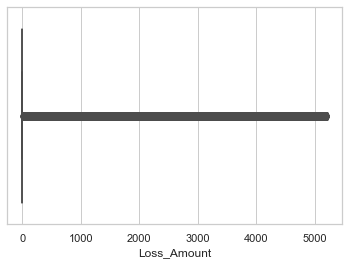

In [9]:
# Large outliers removed based on Loss_Amount
q = df["Loss_Amount"].quantile(0.99)
df = df[df['Loss_Amount'] < q]
sns.boxplot(x=df[field])

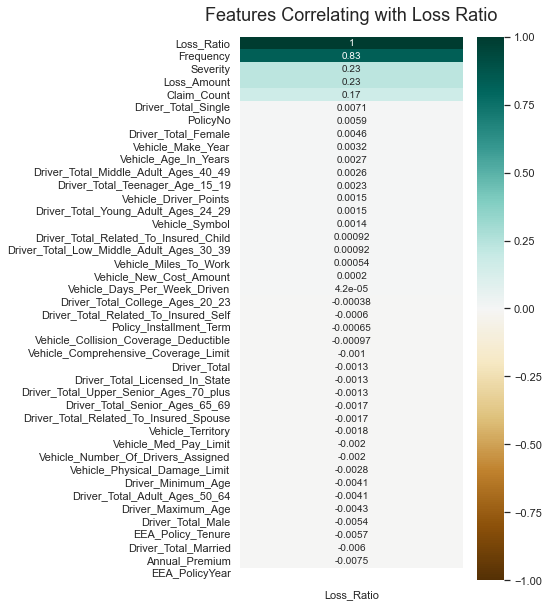

In [10]:
plt.figure(figsize=(5, 10))
heatmap = sns.heatmap(df.corr()[['Loss_Ratio']].sort_values(by='Loss_Ratio', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Loss Ratio', fontdict={'fontsize':18}, pad=16);

In [11]:
# Strip unnecessary white space from cells in vehicle usage column
df.Vehicle_Usage = df.Vehicle_Usage.str.rstrip()

In [110]:
df[df['Loss_Amount'] < 0]

,PolicyNo,Policy_Company,Policy_Installment_Term,Policy_Billing_Code,Policy_Method_Of_Payment,Policy_Reinstatement_Fee_Indicator,Policy_Zip_Code_Garaging_Location,Vehicle_Territory,Vehicle_Make_Year,Vehicle_Make_Description,...,EEA_Prior_Bodily_Injury_Limit,EEA_PolicyYear,SYS_Renewed,SYS_New_Business,Annual_Premium,Claim_Count,Loss_Amount,Frequency,Severity,Loss_Ratio


# Create Portfolios

In [12]:
# Train/test split and set value for number of most seen car brands to get counts for
test_size = 0.3
random_state = 40
train, test = train_test_split(df, test_size=test_size, random_state=40)

In [13]:
# Get most seen car brand names
num_brands = 35
veh_brands = df['Vehicle_Make_Description'].str.split(' ').str[0]
brand_names = veh_brands.value_counts().index.tolist()[:num_brands]

In [14]:
# Get top terrorities by car count
num_territories = 10
territories = df['Vehicle_Territory'].value_counts().index.tolist()[:num_territories]

### List of Features

In [15]:
# Vehicle Age in Years - Mean
# Vehicle Age in Years - STD
# Annual Premium - Mean
# Annual Premium - STD
# Annual Premium - Quartile 1
# Annual Premium - Quartile 2
# Annual Premium - Quartile 3
# Driver Minimum Age - Mean
# Driver Minimum Age - STD
# Driver Minimum Age - Quartile 1
# Driver Minimum Age - Quartile 2
# Driver Minimum Age - Quartile 3
# Vehicle Performance - One hot encoded sum
# Vehicle Make Year - Mean
# Vehicle Make Year - STD
# Vehicle Make Year - Quartile 1
# Vehicle Make Year - Quartile 2
# Vehicle Make Year - Quartile 3
# Vehicle Usage - One hot encoded sum
# Vehicle Theft Device - One hot encoded sum
# Vehicle Passive Restraint - One hot encoded sum
# Vehicle Medical Pay Limit - Mean
# Vehicle Medical Pay Limit - STD
# Vehicle Physical Damage Limit - Mean
# Vehicle Physical Damage Limit - STD
# Vehicle Comprehensive Coverage Indicator - Binary sum
# Vehicle Collision Coverage Indicator - Binary sum
# Driver Total - Mean
# Driver Total - STD
# Driver Total Male - Mean
# Driver Total Male - STD
# Driver Total Female - Mean
# Driver Total Female - STD
# Driver Maximum Age - Mean
# Driver Maximum Age - STD
# Driver Maximum Age - Quartile 1
# Driver Maximum Age - Quartile 2
# Driver Maximum Age - Quartile 3
# Driver Total Young Ages 15-23 - Sum
# Driver Total Young Adult Ages 24-39 - Sum
# Driver Total Old Adult Ages 40-64 - Sum
# Driver Total Senior Ages 65+ - Sum
# Vehicle Youthful Driver Indicator - Binary sum
# Vehicle Driver Points - Mean
# Vehicle Driver Points - STD
# Vehicle Safe Driver Discount Indicator - Binary sum
# Policy Company - Binary Sum
# Policy Installment Term - Binary Sum
# Policy Billing Code - Binary Sum
# Policy Method Of Payment - Binary Sum
# Policy Reinstatement Fee Indicator - Binary Sum
# Vehicle New Cost Amount - Mean
# Vehicle New Cost Amount - STD
# Vehicle Miles to Work - Mean
# Vehicle Miles to Work - STD
# Vehicle Comprehensive Coverage Limit - Mean
# Vehicle Comprehensive Coverage Limit - STD
# Vehicle Collision Coverage Deductible - Mean
# Vehicle Collision Coverage Deductible - STD
# Driver Total Related to Insured Self - Mean
# Driver Total Related to Insured Self - STD
# EEA Liability Coverage Only Indicator - BInary Sums
# EEA Multi Auto Policies Indicator - Binary Sums
# EEA Packaged Policy Indicator - Binary Sums
# EEA Full Coverage Indiactor - Binary Sums
# Count for top N(N = num_brands) most seen brands of vehicles
# Top N(N = num_territories) highest vehicle count territories

In [16]:
# Creates features for each portfolio, every portfolio being made from a chunk of policies(rows in the original dataframe) of size numOfPolicy
def create_porfolios(frame, frameId, numOfPolicy):
    leftBoundary = frameId * numOfPolicy
    rightBoundary = leftBoundary + numOfPolicy
    dataframe = frame.iloc[leftBoundary:rightBoundary]
    
    
    # Experiment
    dataframe = dataframe[dataframe['Loss_Ratio'] > 0]    
    
    
    
    # Top num_brands most seen vehicle brands
    brands = dataframe['Vehicle_Make_Description'].str.split(' ').str[0]   
    veh_brand = pd.get_dummies(brands)
    veh_brand = veh_brand.add_prefix('COUNT_')
    veh_brand_counts = {}
    for brand_name in brand_names:
        real_name = "COUNT_" + brand_name
        if real_name in veh_brand.columns.values:
            veh_brand_counts[real_name] = veh_brand[real_name].sum()
        else:
            veh_brand_counts[real_name] = 0
            
            
    
    # Top num_territories by vehicle count
    terrs = pd.get_dummies(dataframe['Vehicle_Territory'], prefix='VEH_TERR', prefix_sep='_')
    veh_terr_counts = {}
    for terr in territories:
        real_name = "VEH_TERR_" + str(terr)
        if real_name in terrs.columns.values:
            veh_terr_counts[real_name] = terrs[real_name].sum()
        else:
            veh_terr_counts[real_name] = 0
    
    
    # For Binary Sum/Count Features
    veh_perf = pd.get_dummies(dataframe['Vehicle_Performance'], prefix='VEH_PERF', prefix_sep='_')
    veh_usage = pd.get_dummies(dataframe['Vehicle_Usage'], prefix='VEH_USAGE', prefix_sep='_')
    veh_atd = pd.get_dummies(dataframe['Vehicle_Anti_Theft_Device'], prefix='VEH_ATD', prefix_sep='_')
    veh_pr = pd.get_dummies(dataframe['Vehicle_Passive_Restraint'], prefix='VEH_PR', prefix_sep='_')
    veh_cci = pd.get_dummies(dataframe['Vehicle_Comprehensive_Coverage_Indicator'], prefix='VEH_CCI', prefix_sep='_')
    veh_colci = pd.get_dummies(dataframe['Vehicle_Collision_Coverage_Indicator'], prefix='VEH_COLCI', prefix_sep='_')
    veh_ydi = pd.get_dummies(dataframe['Vehicle_Youthful_Driver_Indicator'], prefix='VEH_YDI', prefix_sep='_')
    veh_sddi = pd.get_dummies(dataframe['Vehicle_Safe_Driver_Discount_Indicator'], prefix='VEH_SDDI', prefix_sep='_')
    pc = pd.get_dummies(dataframe['Policy_Company'], prefix='PC', prefix_sep='_')
    pit = pd.get_dummies(dataframe['Policy_Installment_Term'], prefix='PIT', prefix_sep='_')
    pbc = pd.get_dummies(dataframe['Policy_Billing_Code'], prefix='PBC', prefix_sep='_')
    pmop = pd.get_dummies(dataframe['Policy_Method_Of_Payment'], prefix='PMOP', prefix_sep='_')
    prfi = pd.get_dummies(dataframe['Policy_Reinstatement_Fee_Indicator'], prefix='PRFI', prefix_sep='_')
    EEA_lcoi = pd.get_dummies(dataframe['EEA_Liability_Coverage_Only_Indicator'], prefix='EEA_LCOI', prefix_sep='_')
    EEA_mapi = pd.get_dummies(dataframe['EEA_Multi_Auto_Policies_Indicator'], prefix='EEA_MAPI', prefix_sep='_')
    EEA_ppi = pd.get_dummies(dataframe['EEA_Packaged_Policy_Indicator'], prefix='EEA_PPI', prefix_sep='_')
    EEA_fci = pd.get_dummies(dataframe['EEA_Full_Coverage_Indicator'], prefix='EEA_FCI', prefix_sep='_')
    
    veh_sddi_y = veh_sddi_n = veh_ydi_y = veh_ydi_n = veh_colci_y = veh_colci_n = veh_cci_y = veh_cci_n = EEA_fci_n = EEA_fci_y = EEA_ppi_y = EEA_ppi_n = EEA_mapi_n = EEA_mapi_y = EEA_lcoi_y = EEA_lcoi_n = prfi_n = prfi_y = pmop_pre = pmop_install = pbc_pf = pbc_dbi = pit_6 = pit_12 = pc_pref = pc_stand = veh_perf_high = veh_perf_intermediate = veh_perf_sports = veh_perf_sports_premium = veh_perf_standard = veh_usage_business = veh_usage_pleasure = veh_usage_farm = veh_usage_work = veh_atd_active  = veh_atd_alarm = veh_atd_na = veh_atd_pdvr = veh_atd_unknown = veh_pr_y = veh_pr_n = veh_pr_unknown = 0
    
    if 'VEH_PERF_High' in veh_perf.columns: veh_perf_high = veh_perf['VEH_PERF_High'].sum()
    if 'VEH_PERF_Intermediate' in veh_perf.columns: veh_perf_intermediate = veh_perf['VEH_PERF_Intermediate'].sum()
    if 'VEH_PERF_Sports' in veh_perf.columns: veh_perf_sports = veh_perf['VEH_PERF_Sports'].sum()
    if 'VEH_PERF_Sports Premium' in veh_perf.columns: veh_perf_sports_premium = veh_perf['VEH_PERF_Sports Premium'].sum()
    if 'VEH_PERF_Standard' in veh_perf.columns: veh_perf_standard = veh_perf['VEH_PERF_Standard'].sum()
    if 'VEH_USAGE_Business' in veh_usage.columns: veh_usage_business = veh_usage['VEH_USAGE_Business'].sum()
    if 'VEH_USAGE_Pleasure' in veh_usage.columns: veh_usage_pleasure = veh_usage['VEH_USAGE_Pleasure'].sum()
    if 'VEH_USAGE_Farm' in veh_usage.columns: veh_usage_farm = veh_usage['VEH_USAGE_Farm'].sum()
    if 'VEH_USAGE_Work' in veh_usage.columns: veh_usage_work = veh_usage['VEH_USAGE_Work'].sum()
    if 'VEH_ATD_Active Disabling' in veh_atd.columns: veh_atd_active = veh_atd['VEH_ATD_Active Disabling'].sum()
    if 'VEH_ATD_Alarm Only' in veh_atd.columns: veh_atd_alarm = veh_atd['VEH_ATD_Alarm Only'].sum()
    if 'VEH_ATD_Not Applicable' in veh_atd.columns: veh_atd_na = veh_atd['VEH_ATD_Not Applicable'].sum()
    if 'VEH_ATD_Passive Disabling-Vehicle Recovery' in veh_atd.columns: veh_atd_pdvr = veh_atd['VEH_ATD_Passive Disabling-Vehicle Recovery'].sum()
    if 'VEH_ATD_Unknown' in veh_atd.columns: veh_atd_unknown = veh_atd['VEH_ATD_Unknown'].sum()
    if 'VEH_PR_Y' in veh_pr.columns: veh_pr_y = veh_pr['VEH_PR_Y'].sum()
    if 'VEH_PR_N' in veh_pr.columns: veh_pr_n = veh_pr['VEH_PR_N'].sum()
    if 'VEH_CCI_Y' in veh_cci.columns: veh_cci_y = veh_cci['VEH_CCI_Y'].sum()
    if 'VEH_CCI_N' in veh_cci.columns: veh_cci_n = veh_cci['VEH_CCI_N'].sum()
    if 'VEH_COLCI_Y' in veh_colci.columns: veh_colci_y = veh_colci['VEH_COLCI_Y'].sum()
    if 'VEH_COLCI_N' in veh_colci.columns: veh_colci_n = veh_colci['VEH_COLCI_N'].sum()
    if 'VEH_YDI_Y' in veh_ydi.columns: veh_ydi_y = veh_ydi['VEH_YDI_Y'].sum()
    if 'VEH_YDI_N' in veh_ydi.columns: veh_ydi_n = veh_ydi['VEH_YDI_N'].sum()
    if 'VEH_SDDI_Y' in veh_sddi.columns: veh_sddi_y = veh_sddi['VEH_SDDI_Y'].sum()
    if 'VEH_SDDI_N' in veh_sddi.columns: veh_sddi_n = veh_sddi['VEH_SDDI_N'].sum()
    if 'VEH_PR_Unknown' in veh_pr.columns: veh_pr_unknown = veh_pr['VEH_PR_Unknown'].sum()
    if 'PC_Standard' in pc.columns: pc_stand = pc['PC_Standard'].sum()
    if 'PC_Preferred' in pc.columns: pc_pref = pc['PC_Preferred'].sum()
    if 'PIT_6' in pit.columns: pit_6 = pit['PIT_6'].sum()
    if 'PIT_12' in pit.columns: pit_12 = pit['PIT_12'].sum()
    if 'PBC_Direct Billed to Insured' in pbc.columns: pbc_dbi = pbc['PBC_Direct Billed to Insured'].sum()
    if 'PBC_Premium Finance' in pbc.columns: pbc_pf = pbc['PBC_Premium Finance'].sum()
    if 'PMOP_Pre-paid' in pmop.columns: pmop_pre = pmop['PMOP_Pre-paid'].sum()
    if 'PMOP_Installment' in pmop.columns: pmop_install = pmop['PMOP_Installment'].sum()
    if 'PRFI_N' in prfi.columns: prfi_n = prfi['PRFI_N'].sum()
    if 'PRFI_Y' in prfi.columns: prfi_y = prfi['PRFI_Y'].sum()
    if 'EEA_LCOI_N' in EEA_lcoi.columns: EEA_lcoi_n = EEA_lcoi['EEA_LCOI_N'].sum()
    if 'EEA_LCOI_Y' in EEA_lcoi.columns: EEA_lcoi_y = EEA_lcoi['EEA_LCOI_Y'].sum()
    if 'EEA_MAPI_N' in EEA_mapi.columns: EEA_mapi_n = EEA_mapi['EEA_MAPI_N'].sum()
    if 'EEA_MAPI_Y' in EEA_mapi.columns: EEA_mapi_y = EEA_mapi['EEA_MAPI_Y'].sum()
    if 'EEA_PPI_N' in EEA_ppi.columns: EEA_ppi_n = EEA_ppi['EEA_PPI_N'].sum()
    if 'EEA_PPI_Y' in EEA_ppi.columns: EEA_ppi_y = EEA_ppi['EEA_PPI_Y'].sum()
    if 'EEA_FCI_N' in EEA_fci.columns: EEA_fci_n = EEA_fci['EEA_FCI_N'].sum()
    if 'EEA_FCI_Y' in EEA_fci.columns: EEA_fci_y = EEA_fci['EEA_FCI_Y'].sum()
        
        
    # For Mean, STD, and Quartile features (and some driver count by age features)
    driver_trtis_mean = dataframe['Driver_Total_Related_To_Insured_Self'].mean()
    driver_trtis_std = dataframe['Driver_Total_Related_To_Insured_Self'].std()
    veh_ccd_mean = dataframe['Vehicle_Collision_Coverage_Deductible'].mean()
    veh_ccd_std = dataframe['Vehicle_Collision_Coverage_Deductible'].std()
    veh_ccl_mean = dataframe['Vehicle_Comprehensive_Coverage_Limit'].mean()
    veh_ccl_std = dataframe['Vehicle_Comprehensive_Coverage_Limit'].std()
    veh_mtw_mean = dataframe['Vehicle_Miles_To_Work'].mean()
    veh_mtw_std = dataframe['Vehicle_Miles_To_Work'].std()
    veh_nca_mean = dataframe['Vehicle_New_Cost_Amount'].mean()
    veh_nca_std = dataframe['Vehicle_New_Cost_Amount'].std()
    veh_driver_points_mean = dataframe['Vehicle_Driver_Points'].mean()
    veh_driver_points_std = dataframe['Vehicle_Driver_Points'].std()
    driver_total_mean = dataframe['Driver_Total'].mean()
    driver_total_std = dataframe['Driver_Total'].std()
    driver_total_male_mean = dataframe['Driver_Total_Male'].mean()
    driver_total_male_std = dataframe['Driver_Total_Male'].std()
    driver_total_female_mean = dataframe['Driver_Total_Female'].mean()
    driver_total_female_std = dataframe['Driver_Total_Female'].std()
    driver_total_young = dataframe['Driver_Total_Teenager_Age_15_19'].sum() + dataframe['Driver_Total_College_Ages_20_23'].sum()
    driver_total_young_adult = dataframe['Driver_Total_Young_Adult_Ages_24_29'].sum() + dataframe['Driver_Total_Low_Middle_Adult_Ages_30_39'].sum()
    driver_total_old_adult = dataframe['Driver_Total_Middle_Adult_Ages_40_49'].sum() + dataframe['Driver_Total_Adult_Ages_50_64'].sum()
    driver_total_senior = dataframe['Driver_Total_Senior_Ages_65_69'].sum() + dataframe['Driver_Total_Upper_Senior_Ages_70_plus'].sum()
    veh_phys_damage_lim_mean = dataframe['Vehicle_Physical_Damage_Limit'].mean()
    veh_phys_damage_lim_std = dataframe['Vehicle_Physical_Damage_Limit'].std()
    veh_med_pay_lim_mean = dataframe['Vehicle_Med_Pay_Limit'].mean()
    veh_med_pay_lim_std = dataframe['Vehicle_Med_Pay_Limit'].std()
    dma_mean = dataframe['Driver_Minimum_Age'].mean()
    dma_std = dataframe['Driver_Minimum_Age'].std()
    dma_quar1 = dataframe['Driver_Minimum_Age'].quantile(0.25)
    dma_quar2 = dataframe['Driver_Minimum_Age'].quantile(0.50)
    dma_quar3 = dataframe['Driver_Minimum_Age'].quantile(0.75)
    dmxa_mean = dataframe['Driver_Maximum_Age'].mean()
    dmxa_std = dataframe['Driver_Maximum_Age'].std()
    dmxa_quar1 = dataframe['Driver_Maximum_Age'].quantile(0.25)
    dmxa_quar2 = dataframe['Driver_Maximum_Age'].quantile(0.50)
    dmxa_quar3 = dataframe['Driver_Maximum_Age'].quantile(0.75)
    vay_mean = dataframe['Vehicle_Age_In_Years'].mean()
    vay_std = dataframe['Vehicle_Age_In_Years'].std()
    ap_mean = dataframe['Annual_Premium'].mean()
    ap_std = dataframe['Annual_Premium'].std()
    ap_quar1 = dataframe['Annual_Premium'].quantile(0.25)
    ap_quar2 = dataframe['Annual_Premium'].quantile(0.50)
    ap_quar3 = dataframe['Annual_Premium'].quantile(0.75)
    vmy_mean = dataframe['Vehicle_Make_Year'].mean()
    vmy_std = dataframe['Vehicle_Make_Year'].std()
    vmy_quar1 = dataframe['Vehicle_Make_Year'].quantile(0.25)
    vmy_quar2 = dataframe['Vehicle_Make_Year'].quantile(0.50)
    vmy_quar3 = dataframe['Vehicle_Make_Year'].quantile(0.75)
    ln_LR = np.log(dataframe['Loss_Amount'].sum() / dataframe['Annual_Premium'].sum())
    data = {'DMA_MEAN': dma_mean, 'DMA_STD': dma_std, 'DMA_QUAR1': dma_quar1, 'DMA_QUAR2': dma_quar2, 
            'DMA_QUAR3': dma_quar3, 'VAY_MEAN': vay_mean, 'VAY_STD': vay_std, 'AP_MEAN': ap_mean, 
            'AP_STD': ap_std, 'AP_QUAR1': ap_quar1, 'AP_QUAR2': ap_quar2, 'AP_QUAR3': ap_quar3, 
            'VEH_PERF_HIGH': veh_perf_high, 'VEH_PERF_INTERMEDIATE': veh_perf_intermediate,
            'VEH_PERF_SPORTS': veh_perf_sports, 'VEH_PERF_SPORTS_PREMIUM': veh_perf_sports_premium, 
            'VEH_PERF_STANDARD': veh_perf_standard, 'VMY_MEAN': vmy_mean, 'VMY_STD': vmy_std, 'VMY_QUAR1': vmy_quar1,
            'VMY_QUAR2': vmy_quar2, 'VMY_QUAR3': vmy_quar3, 'VEH_USAGE_BUSINESS': veh_usage_business, 
            'VEH_USAGE_PLEASURE': veh_usage_pleasure, 'VEH_USAGE_FARM': veh_usage_farm, 'VEH_USAGE_WORK': veh_usage_work, 
            'VEH_ATD_ACTIVE': veh_atd_active, 'VEH_ATD_ALARM': veh_atd_alarm, 'VEH_ATD_NA': veh_atd_na, 
            'VEH_ATD_PDVR': veh_atd_pdvr, 'VEH_ATD_UNKNOWN': veh_atd_unknown, 'VEH_PR_Y': veh_pr_y, 
            'VEH_PR_N': veh_pr_n, 'VEH_PR_UNKNOWN': veh_pr_unknown, 'VEH_MED_PAY_LIM_MEAN': veh_med_pay_lim_mean, 
            'VEH_MED_PAY_LIM_STD': veh_med_pay_lim_std, 'VEH_PHYS_DAMAGE_LIM_MEAN': veh_phys_damage_lim_mean,
            'VEH_PHYS_DAMAGE_LIM_STD': veh_phys_damage_lim_std, 'VEH_CCI_Y': veh_cci_y, 'VEH_CCI_N': veh_cci_n,
            'VEH_COLCI_Y': veh_colci_y, 'VEH_COLCI_N': veh_colci_n, 'DRIVER_TOTAL_MEAN': driver_total_mean,
            'DRIVER_TOTAL_STD': driver_total_std, 'DRIVER_TOTAL_MALE_MEAN': driver_total_male_mean, 
            'DRIVER_TOTAL_MALE_STD': driver_total_male_std, 'DRIVER_TOTAL_FEMALE_MEAN': driver_total_female_mean, 
            'DRIVER_TOTAL_FEMALE_STD': driver_total_female_std, 'DMXA_MEAN': dmxa_mean, 'DMXA_STD': dmxa_std, 
            'DMXA_QUAR1': dmxa_quar1, 'DMXA_QUAR2': dmxa_quar2, 'DMXA_QUAR3': dmxa_quar3, 'DRIVER_TOTAL_YOUNG': driver_total_young, 
            'DRIVER_TOTAL_YOUNG_ADULT': driver_total_young_adult, 'DRIVER_TOTAL_OLD_ADULT': driver_total_old_adult, 
            'DRIVER_TOTAL_SENIOR': driver_total_senior, 'VEH_YDI_Y': veh_ydi_y, 'VEH_YDI_N': veh_ydi_n,
            'VEH_DRIVER_POINTS_MEAN': veh_driver_points_mean, 'VEH_DRIVER_POINTS_STD': veh_driver_points_std, 
            'VEH_SSDI_Y': veh_sddi_y, 'VEH_SDDI_N': veh_sddi_n, 'PC_STAND': pc_stand, 'PC_PREF': pc_pref, 'PIT_6': pit_6, 
            'PIT_12': pit_12, 'PBC_DBI' : pbc_dbi, 'PBC_PF': pbc_pf, 'PMOP_PRE': pmop_pre, 'PMOP_INSTALL': pmop_install, 
            'PRFI_N': prfi_n, 'PRFI_Y': prfi_y, 'VEH_NCA_MEAN': veh_nca_mean, 'VEH_NCA_STD': veh_nca_std, 
            'VEH_MTW_MEAN': veh_mtw_mean, 'VEH_MTW_STD': veh_mtw_std, 'VEH_CCL_MEAN': veh_ccl_mean, 'VEH_CCL_STD': veh_ccl_std, 
            'VEH_CCD_MEAN': veh_ccd_mean, 'VEH_CCD_STD': veh_ccd_std, 'DRIV_TRTIS_MEAN': driver_trtis_mean, 
            'DRIV_TRTIS_STD': driver_trtis_std, 'EEA_LCOI_N': EEA_lcoi_n, 'EEA_LCOI_Y': EEA_lcoi_y, 'EEA_MAPI_N': EEA_mapi_n, 
            'EEA_MAPI_Y': EEA_mapi_y, 'EEA_PPI_N': EEA_ppi_n, 'EEA_PPI_Y': EEA_ppi_y, 'EEA_FCI_N': EEA_fci_n, 
            'EEA_FCI_Y': EEA_fci_y, 'ln_LR': ln_LR}
    
    feats = veh_brand_counts
    feats.update(veh_terr_counts)
    feats.update(data)
    return feats

In [17]:
# Features and target
feat_columns = ['DMA_MEAN', 'DMA_STD', 'DMA_QUAR1', 'DMA_QUAR2', 
            'DMA_QUAR3', 'VAY_MEAN', 'VAY_STD', 'AP_MEAN', 
            'AP_STD', 'AP_QUAR1', 'AP_QUAR2', 'AP_QUAR3', 
            'VEH_PERF_HIGH', 'VEH_PERF_INTERMEDIATE',
            'VEH_PERF_SPORTS', 'VEH_PERF_SPORTS_PREMIUM', 
            'VEH_PERF_STANDARD', 'VMY_MEAN', 'VMY_STD', 'VMY_QUAR1',
            'VMY_QUAR2', 'VMY_QUAR3', 'VEH_USAGE_BUSINESS', 
            'VEH_USAGE_PLEASURE', 'VEH_USAGE_FARM', 'VEH_USAGE_WORK', 
            'VEH_ATD_ACTIVE', 'VEH_ATD_ALARM', 'VEH_ATD_NA', 
            'VEH_ATD_PDVR', 'VEH_ATD_UNKNOWN', 'VEH_PR_Y', 
            'VEH_PR_N', 'VEH_PR_UNKNOWN', 'VEH_MED_PAY_LIM_MEAN', 
            'VEH_MED_PAY_LIM_STD', 'VEH_PHYS_DAMAGE_LIM_MEAN',
            'VEH_PHYS_DAMAGE_LIM_STD', 'VEH_CCI_Y', 'VEH_CCI_N',
            'VEH_COLCI_Y', 'VEH_COLCI_N', 'DRIVER_TOTAL_MEAN',
            'DRIVER_TOTAL_STD', 'DRIVER_TOTAL_MALE_MEAN', 
            'DRIVER_TOTAL_MALE_STD', 'DRIVER_TOTAL_FEMALE_MEAN', 
            'DRIVER_TOTAL_FEMALE_STD', 'DMXA_MEAN', 'DMXA_STD', 
            'DMXA_QUAR1', 'DMXA_QUAR2', 'DMXA_QUAR3', 'DRIVER_TOTAL_YOUNG', 
            'DRIVER_TOTAL_YOUNG_ADULT', 'DRIVER_TOTAL_OLD_ADULT', 
            'DRIVER_TOTAL_SENIOR', 'VEH_YDI_Y', 'VEH_YDI_N',
            'VEH_DRIVER_POINTS_MEAN', 'VEH_DRIVER_POINTS_STD', 
            'VEH_SSDI_Y', 'VEH_SDDI_N', 'PC_STAND', 'PC_PREF', 'PIT_6', 
            'PIT_12', 'PBC_DBI', 'PBC_PF', 'PMOP_PRE', 'PMOP_INSTALL', 
            'PRFI_N', 'PRFI_Y', 'VEH_NCA_MEAN', 'VEH_NCA_STD', 
            'VEH_MTW_MEAN', 'VEH_MTW_STD', 'VEH_CCL_MEAN', 'VEH_CCL_STD', 
            'VEH_CCD_MEAN', 'VEH_CCD_STD', 'DRIV_TRTIS_MEAN', 
            'DRIV_TRTIS_STD', 'EEA_LCOI_N', 'EEA_LCOI_Y', 'EEA_MAPI_N', 
            'EEA_MAPI_Y', 'EEA_PPI_N', 'EEA_PPI_Y', 'EEA_FCI_N', 
            'EEA_FCI_Y']

brand_cols = ["COUNT_" + brand for brand in brand_names]
terr_cols = ["VEH_TERR_" + str(terr) for terr in territories]
feat_columns = brand_cols + terr_cols + feat_columns

columns = feat_columns.copy()
columns.append('ln_LR')

In [18]:
# Create empty dataframe with column names
df_feats_train = pd.DataFrame(columns=columns)
df_feats_test = pd.DataFrame(columns=columns)

In [19]:
# Num of policies per portfolio
# For loop creates dataframe containing all the portfolios
policy_num_per_portfolio = 1000



for i in range(0, int(train.shape[0] / policy_num_per_portfolio)):
    data = pd.DataFrame(create_porfolios(train, i, policy_num_per_portfolio), [i])
    df_feats_train = pd.concat([df_feats_train, data], ignore_index=True)
    
for i in range(0, int(test.shape[0] / policy_num_per_portfolio)):
    data = pd.DataFrame(create_porfolios(test, i, policy_num_per_portfolio), [i])
    df_feats_test = pd.concat([df_feats_test, data], ignore_index=True)

In [20]:
# Portfolios
df_feats_train.head(5)

,COUNT_FORD,COUNT_CHEV,COUNT_TYTA,COUNT_DODG,COUNT_HOND,COUNT_NSSN,COUNT_GMC,COUNT_JEEP,COUNT_PONT,COUNT_BUIK,COUNT_MERC,COUNT_OLDS,COUNT_CHRY,COUNT_MAZD,COUNT_CADI,COUNT_LINC,COUNT_MITS,COUNT_KIA,COUNT_SATN,COUNT_PLYM,COUNT_ISZU,COUNT_VLKS,COUNT_LEXS,COUNT_ACUR,COUNT_MBNZ,COUNT_BMW,COUNT_HYUN,COUNT_VLVO,COUNT_CHEVY,COUNT_DODGE,COUNT_INFI,COUNT_CHEVROLET,COUNT_SUZU,COUNT_SUBA,COUNT_JAG,VEH_TERR_31,VEH_TERR_35,VEH_TERR_30,VEH_TERR_27,VEH_TERR_32,VEH_TERR_37,VEH_TERR_17,VEH_TERR_13,VEH_TERR_26,VEH_TERR_20,DMA_MEAN,DMA_STD,DMA_QUAR1,DMA_QUAR2,DMA_QUAR3,VAY_MEAN,VAY_STD,AP_MEAN,AP_STD,AP_QUAR1,AP_QUAR2,AP_QUAR3,VEH_PERF_HIGH,VEH_PERF_INTERMEDIATE,VEH_PERF_SPORTS,VEH_PERF_SPORTS_PREMIUM,VEH_PERF_STANDARD,VMY_MEAN,VMY_STD,VMY_QUAR1,VMY_QUAR2,VMY_QUAR3,VEH_USAGE_BUSINESS,VEH_USAGE_PLEASURE,VEH_USAGE_FARM,VEH_USAGE_WORK,VEH_ATD_ACTIVE,VEH_ATD_ALARM,VEH_ATD_NA,VEH_ATD_PDVR,VEH_ATD_UNKNOWN,VEH_PR_Y,VEH_PR_N,VEH_PR_UNKNOWN,VEH_MED_PAY_LIM_MEAN,VEH_MED_PAY_LIM_STD,VEH_PHYS_DAMAGE_LIM_MEAN,VEH_PHYS_DAMAGE_LIM_STD,VEH_CCI_Y,VEH_CCI_N,VEH_COLCI_Y,VEH_COLCI_N,DRIVER_TOTAL_MEAN,DRIVER_TOTAL_STD,DRIVER_TOTAL_MALE_MEAN,DRIVER_TOTAL_MALE_STD,DRIVER_TOTAL_FEMALE_MEAN,DRIVER_TOTAL_FEMALE_STD,DMXA_MEAN,DMXA_STD,DMXA_QUAR1,DMXA_QUAR2,DMXA_QUAR3,DRIVER_TOTAL_YOUNG,DRIVER_TOTAL_YOUNG_ADULT,DRIVER_TOTAL_OLD_ADULT,DRIVER_TOTAL_SENIOR,VEH_YDI_Y,VEH_YDI_N,VEH_DRIVER_POINTS_MEAN,VEH_DRIVER_POINTS_STD,VEH_SSDI_Y,VEH_SDDI_N,PC_STAND,PC_PREF,PIT_6,PIT_12,PBC_DBI,PBC_PF,PMOP_PRE,PMOP_INSTALL,PRFI_N,PRFI_Y,VEH_NCA_MEAN,VEH_NCA_STD,VEH_MTW_MEAN,VEH_MTW_STD,VEH_CCL_MEAN,VEH_CCL_STD,VEH_CCD_MEAN,VEH_CCD_STD,DRIV_TRTIS_MEAN,DRIV_TRTIS_STD,EEA_LCOI_N,EEA_LCOI_Y,EEA_MAPI_N,EEA_MAPI_Y,EEA_PPI_N,EEA_PPI_Y,EEA_FCI_N,EEA_FCI_Y,ln_LR
0,9,6,2,1,1,1,1,0,0,0,1,1,0,1,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,12,10,4,0,1,1,0,0,0,0,41.586207,14.737022,30.00,41.0,51.00,6.000000,2.738613,400.091034,155.496833,350.8600,385.84,444.1400,1,0,0,0,28,2000.517241,4.231014,1999.00,2001.0,2003.00,1,12,5,11,1,5,10,13,0,28,1,0,3241.068966,6440.299172,49999.965517,45316.387765,1,28,25,4,1.137931,0.350931,0.448276,0.506120,0.689655,0.541390,43.724138,14.640688,32.00,43.0,54.00,3,11,17,2,4,25,0.068966,0.257881,13,16,0,2,28,1,29,0,14,15,23,6,688.689655,3714.092459,4.793103,8.478457,2585.241379,13927.336059,482.620690,275.178178,0.689655,0.470824,28,1,3,26,13,16,4,25,1.449507
1,5,10,6,1,4,3,0,1,0,2,1,1,2,1,1,2,0,2,0,0,0,0,1,0,0,2,0,1,0,1,0,0,0,0,0,20,11,8,4,1,0,0,1,1,0,43.250000,16.825133,30.75,41.5,53.50,6.479167,2.909921,425.253542,234.363774,252.8100,415.52,494.4900,0,1,0,0,47,1998.416667,5.974532,1994.75,1999.0,2003.25,2,28,5,13,2,7,17,22,0,38,10,0,4145.625000,10375.976848,51249.937500,30343.882801,3,45,36,12,1.062500,0.244623,0.562500,0.501328,0.500000,0.505291,43.312500,16.810782,30.75,41.5,53.50,4,20,21,6,6,42,0.187500,0.445127,23,25,0,3,47,1,47,1,20,28,40,8,290.687500,2020.870280,2.020833,5.510105,13540.729167,73288.868189,359.125000,236.189396,0.708333,0.459340,41,7,4,44,21,27,12,36,1.391060
2,7,9,6,5,4,4,2,2,1,0,0,0,3,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,17,12,9,1,0,2,2,1,0,1,40.191489,14.018060,29.00,39.0,50.00,6.361702,2.399507,426.368085,165.738753,338.6700,451.56,502.4400,0,2,0,0,45,1999.425532,4.897846,1997.50,2001.0,2002.50,0,24,6,17,1,4,21,21,0,41,6,0,2382.808511,2715.272896,46702.106383,25458.373182,1,46,36,11,1.148936,0.359875,0.489362,0.505291,0.659574,0.562471,42.191489,13.187013,36.00,45.0,51.00,8,18,27,1,9,38,0.212766,0.463267,24,23,0,1,46,1,46,1,22,25,42,5,403.276596,2771.580703,4.191489,9.622524,2126.680851,14586.645015,333.808511,246.844841,0.680851,0.471186,44,3,4,43,16,31,11,36,1.249667
3,9,7,2,3,1,1,3,1,2,0,0,1,0,1,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,22,5,2,1,3,0,0,2,0,0,38.800000,14.818113,25.50,42.0,48.00,5.400000,3.001960,488.275714,232.075580,340.6700,453.68,528.4100,1,3,0,0,31,2000.771429,5.755231,1998.00,2002.0,2005.00,0,12,6,17,2,5,10,18,0,32,3,0,2256.942857,2671.842941,54571.428571,29138.902352,0,35,31,4,1.171429,0.382385,0.514286,0.562109,0.65714

In [21]:
df_feats_test.head(5)

,COUNT_FORD,COUNT_CHEV,COUNT_TYTA,COUNT_DODG,COUNT_HOND,COUNT_NSSN,COUNT_GMC,COUNT_JEEP,COUNT_PONT,COUNT_BUIK,COUNT_MERC,COUNT_OLDS,COUNT_CHRY,COUNT_MAZD,COUNT_CADI,COUNT_LINC,COUNT_MITS,COUNT_KIA,COUNT_SATN,COUNT_PLYM,COUNT_ISZU,COUNT_VLKS,COUNT_LEXS,COUNT_ACUR,COUNT_MBNZ,COUNT_BMW,COUNT_HYUN,COUNT_VLVO,COUNT_CHEVY,COUNT_DODGE,COUNT_INFI,COUNT_CHEVROLET,COUNT_SUZU,COUNT_SUBA,COUNT_JAG,VEH_TERR_31,VEH_TERR_35,VEH_TERR_30,VEH_TERR_27,VEH_TERR_32,VEH_TERR_37,VEH_TERR_17,VEH_TERR_13,VEH_TERR_26,VEH_TERR_20,DMA_MEAN,DMA_STD,DMA_QUAR1,DMA_QUAR2,DMA_QUAR3,VAY_MEAN,VAY_STD,AP_MEAN,AP_STD,AP_QUAR1,AP_QUAR2,AP_QUAR3,VEH_PERF_HIGH,VEH_PERF_INTERMEDIATE,VEH_PERF_SPORTS,VEH_PERF_SPORTS_PREMIUM,VEH_PERF_STANDARD,VMY_MEAN,VMY_STD,VMY_QUAR1,VMY_QUAR2,VMY_QUAR3,VEH_USAGE_BUSINESS,VEH_USAGE_PLEASURE,VEH_USAGE_FARM,VEH_USAGE_WORK,VEH_ATD_ACTIVE,VEH_ATD_ALARM,VEH_ATD_NA,VEH_ATD_PDVR,VEH_ATD_UNKNOWN,VEH_PR_Y,VEH_PR_N,VEH_PR_UNKNOWN,VEH_MED_PAY_LIM_MEAN,VEH_MED_PAY_LIM_STD,VEH_PHYS_DAMAGE_LIM_MEAN,VEH_PHYS_DAMAGE_LIM_STD,VEH_CCI_Y,VEH_CCI_N,VEH_COLCI_Y,VEH_COLCI_N,DRIVER_TOTAL_MEAN,DRIVER_TOTAL_STD,DRIVER_TOTAL_MALE_MEAN,DRIVER_TOTAL_MALE_STD,DRIVER_TOTAL_FEMALE_MEAN,DRIVER_TOTAL_FEMALE_STD,DMXA_MEAN,DMXA_STD,DMXA_QUAR1,DMXA_QUAR2,DMXA_QUAR3,DRIVER_TOTAL_YOUNG,DRIVER_TOTAL_YOUNG_ADULT,DRIVER_TOTAL_OLD_ADULT,DRIVER_TOTAL_SENIOR,VEH_YDI_Y,VEH_YDI_N,VEH_DRIVER_POINTS_MEAN,VEH_DRIVER_POINTS_STD,VEH_SSDI_Y,VEH_SDDI_N,PC_STAND,PC_PREF,PIT_6,PIT_12,PBC_DBI,PBC_PF,PMOP_PRE,PMOP_INSTALL,PRFI_N,PRFI_Y,VEH_NCA_MEAN,VEH_NCA_STD,VEH_MTW_MEAN,VEH_MTW_STD,VEH_CCL_MEAN,VEH_CCL_STD,VEH_CCD_MEAN,VEH_CCD_STD,DRIV_TRTIS_MEAN,DRIV_TRTIS_STD,EEA_LCOI_N,EEA_LCOI_Y,EEA_MAPI_N,EEA_MAPI_Y,EEA_PPI_N,EEA_PPI_Y,EEA_FCI_N,EEA_FCI_Y,ln_LR
0,10,11,4,0,1,2,2,1,3,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,17,7,11,0,1,1,3,0,0,0,40.707317,14.613767,31.00,41.0,50.00,6.512195,2.984309,465.310732,254.746423,327.5400,446.26,527.880,0,2,1,0,38,1998.658537,5.383353,1995.00,1999.0,2003.00,0,22,2,17,2,5,19,15,0,35,6,0,4585.195122,10599.546477,49756.048780,41727.616755,2,39,33,8,1.121951,0.331295,0.585366,0.546608,0.536585,0.504854,41.975610,15.726550,31.00,42.0,51.00,4,18,19,5,5,36,0.268293,0.707969,16,25,0,1,36,5,39,2,15,26,30,11,-1.000000,0.000000,5.390244,10.511608,4267.341463,19286.252688,390.048780,244.302471,0.829268,0.380949,38,3,4,37,15,26,8,33,1.346549
1,5,6,5,1,1,1,2,0,1,0,0,0,0,1,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,20,4,1,1,1,0,1,0,0,0,43.785714,13.538305,37.00,45.5,50.25,6.285714,2.760262,468.338214,224.373334,367.2900,456.86,515.690,0,3,0,0,25,2000.214286,4.103812,1997.75,2001.0,2002.25,0,10,4,14,1,2,12,13,0,26,2,0,1392.607143,2078.978352,66964.285714,89508.320384,0,28,23,5,1.142857,0.356348,0.428571,0.503953,0.714286,0.460044,45.392857,11.836351,39.50,45.5,50.25,3,7,20,2,4,24,0.285714,0.599824,10,18,0,1,27,1,28,0,11,17,24,4,-1.000000,0.000000,4.107143,7.078079,-1.000000,0.000000,374.821429,231.040650,0.821429,0.390021,23,5,4,24,16,12,5,23,1.161361
2,10,12,3,3,0,2,0,0,1,0,0,2,0,1,0,0,1,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,16,11,4,2,0,1,0,0,0,2,41.815789,16.935259,32.25,43.5,51.00,7.078947,2.464687,413.254474,243.874405,316.0325,384.25,465.340,1,1,0,0,36,1998.526316,4.819649,1997.00,1998.5,2001.75,0,16,2,20,3,3,20,12,0,31,7,0,3710.473684,8026.696391,38947.342105,16771.897854,1,37,30,8,1.078947,0.273276,0.394737,0.495355,0.684211,0.471069,42.842105,16.374876,33.50,44.0,51.00,7,11,19,4,7,31,0.184211,0.392859,17,21,0,2,37,1,37,1,13,25,28,10,604.289474,3731.254907,3.947368,6.177323,5262.184211,32444.446448,319.526316,210.072026,0.631579,0.488852,36,2,7,31,22,16,8,30,1.141863
3,9,15,0,3,3,3,3,0,1,0,0,1,0,0,0,0,0,0,3,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,23,8,8,1,0,1,1,1,0,0,48.863636,13.227158,37.75,46.5,58.00,6.340909,2.693171,415.114545,160.053464,335.2250,408.63,489.985,0,1,0,0,43,1999.500000,4.707737,1997.00,2001.0,2003.00,2,25,5,12,0,3,26,15,0,37,7,0,2113.477273,4012.948272,51590.863636,28156.061237,2,42,38,6,1.045455,0.210707,0.590909,0.497350,0.454545,0.503686,48.90909

In [22]:
# Separate features and target
train_features = df_feats_train[feat_columns]
train_target = df_feats_train['ln_LR']
test_features = df_feats_test[feat_columns]
test_target = df_feats_test['ln_LR']
print(train_features.shape)
print(train_target.shape)
print(test_features.shape)
print(test_target.shape)

(294, 136)
(294,)
(126, 136)
(126,)


In [23]:
# Scaling train and test features
scaler = StandardScaler()
scaled_train_features = scaler.fit_transform(train_features.values)
scaled_train_features = pd.DataFrame(scaled_train_features, index=train_features.index, columns=train_features.columns)
scaled_test_features = scaler.transform(test_features)
scaled_test_features = pd.DataFrame(scaled_test_features, index=test_features.index, columns=test_features.columns)

In [24]:
print(scaled_train_features.mean(axis=0))
print()
print(scaled_train_features.std(axis=0))
print()
print(scaled_test_features.mean(axis=0))
print()
print(scaled_test_features.std(axis=0))

COUNT_FORD                  5.286776e-17
COUNT_CHEV                  5.664403e-17
COUNT_TYTA                  1.359457e-17
COUNT_DODG                 -1.283931e-16
COUNT_HOND                  1.686104e-16
COUNT_NSSN                  6.042030e-18
COUNT_GMC                  -1.208406e-17
COUNT_JEEP                  1.782399e-16
COUNT_PONT                  0.000000e+00
COUNT_BUIK                 -2.167578e-16
COUNT_MERC                 -1.850372e-16
COUNT_OLDS                 -4.682573e-17
COUNT_CHRY                 -1.113999e-17
COUNT_MAZD                  1.661558e-17
COUNT_CADI                  5.286776e-18
COUNT_LINC                  2.416812e-17
COUNT_MITS                  4.984675e-17
COUNT_KIA                   1.586033e-17
COUNT_SATN                  1.586033e-17
COUNT_PLYM                 -1.491626e-16
COUNT_ISZU                  2.039185e-16
COUNT_VLKS                  1.068684e-16
COUNT_LEXS                  9.251859e-17
COUNT_ACUR                 -1.389667e-16
COUNT_MBNZ      

In [25]:
scaled_train_features.head(5)

,COUNT_FORD,COUNT_CHEV,COUNT_TYTA,COUNT_DODG,COUNT_HOND,COUNT_NSSN,COUNT_GMC,COUNT_JEEP,COUNT_PONT,COUNT_BUIK,COUNT_MERC,COUNT_OLDS,COUNT_CHRY,COUNT_MAZD,COUNT_CADI,COUNT_LINC,COUNT_MITS,COUNT_KIA,COUNT_SATN,COUNT_PLYM,COUNT_ISZU,COUNT_VLKS,COUNT_LEXS,COUNT_ACUR,COUNT_MBNZ,COUNT_BMW,COUNT_HYUN,COUNT_VLVO,COUNT_CHEVY,COUNT_DODGE,COUNT_INFI,COUNT_CHEVROLET,COUNT_SUZU,COUNT_SUBA,COUNT_JAG,VEH_TERR_31,VEH_TERR_35,VEH_TERR_30,VEH_TERR_27,VEH_TERR_32,VEH_TERR_37,VEH_TERR_17,VEH_TERR_13,VEH_TERR_26,VEH_TERR_20,DMA_MEAN,DMA_STD,DMA_QUAR1,DMA_QUAR2,DMA_QUAR3,VAY_MEAN,VAY_STD,AP_MEAN,AP_STD,AP_QUAR1,AP_QUAR2,AP_QUAR3,VEH_PERF_HIGH,VEH_PERF_INTERMEDIATE,VEH_PERF_SPORTS,VEH_PERF_SPORTS_PREMIUM,VEH_PERF_STANDARD,VMY_MEAN,VMY_STD,VMY_QUAR1,VMY_QUAR2,VMY_QUAR3,VEH_USAGE_BUSINESS,VEH_USAGE_PLEASURE,VEH_USAGE_FARM,VEH_USAGE_WORK,VEH_ATD_ACTIVE,VEH_ATD_ALARM,VEH_ATD_NA,VEH_ATD_PDVR,VEH_ATD_UNKNOWN,VEH_PR_Y,VEH_PR_N,VEH_PR_UNKNOWN,VEH_MED_PAY_LIM_MEAN,VEH_MED_PAY_LIM_STD,VEH_PHYS_DAMAGE_LIM_MEAN,VEH_PHYS_DAMAGE_LIM_STD,VEH_CCI_Y,VEH_CCI_N,VEH_COLCI_Y,VEH_COLCI_N,DRIVER_TOTAL_MEAN,DRIVER_TOTAL_STD,DRIVER_TOTAL_MALE_MEAN,DRIVER_TOTAL_MALE_STD,DRIVER_TOTAL_FEMALE_MEAN,DRIVER_TOTAL_FEMALE_STD,DMXA_MEAN,DMXA_STD,DMXA_QUAR1,DMXA_QUAR2,DMXA_QUAR3,DRIVER_TOTAL_YOUNG,DRIVER_TOTAL_YOUNG_ADULT,DRIVER_TOTAL_OLD_ADULT,DRIVER_TOTAL_SENIOR,VEH_YDI_Y,VEH_YDI_N,VEH_DRIVER_POINTS_MEAN,VEH_DRIVER_POINTS_STD,VEH_SSDI_Y,VEH_SDDI_N,PC_STAND,PC_PREF,PIT_6,PIT_12,PBC_DBI,PBC_PF,PMOP_PRE,PMOP_INSTALL,PRFI_N,PRFI_Y,VEH_NCA_MEAN,VEH_NCA_STD,VEH_MTW_MEAN,VEH_MTW_STD,VEH_CCL_MEAN,VEH_CCL_STD,VEH_CCD_MEAN,VEH_CCD_STD,DRIV_TRTIS_MEAN,DRIV_TRTIS_STD,EEA_LCOI_N,EEA_LCOI_Y,EEA_MAPI_N,EEA_MAPI_Y,EEA_PPI_N,EEA_PPI_Y,EEA_FCI_N,EEA_FCI_Y
0,0.675812,-0.386618,-0.368360,-0.845385,-0.897228,-0.585635,-0.214577,-1.033740,-1.116581,-0.902865,0.278486,0.583953,-0.994056,0.720718,-0.696526,-0.69160,0.818610,0.991305,1.742395,-0.408944,-0.439581,-0.488495,-0.474795,-0.576215,-0.452595,1.622293,-0.422361,-0.450442,-0.206284,-0.197153,2.637979,-0.101535,-0.197153,-0.144338,-0.16028,-0.881010,0.892338,-0.965813,-1.108414,0.336463,0.488393,-0.682234,-0.659484,-0.537127,-0.574626,-0.911193,-0.639640,-0.704390,-0.642312,-0.868108,-0.808896,0.104257,-0.875224,-1.054485,1.046742,-0.793995,-1.453663,0.590372,-1.115880,-0.285472,-0.336336,-0.860259,1.361900,-0.929098,1.736518,0.854983,-0.000901,1.485563,-1.414016,1.203233,-0.829490,-0.090536,1.105372,-1.576676,-0.374935,0.0,-0.359935,-1.719928,0.0,0.225807,0.284616,0.389555,0.959517,-0.386526,-0.950066,-0.686443,-0.892715,0.381701,0.503357,0.006005,-0.059582,0.252144,0.983165,-0.584854,-0.527399,-0.631131,-0.476046,-0.352484,-0.441156,-0.152878,-0.428240,-1.088711,-0.114742,-1.008558,-1.328266,-1.353022,-1.337459,-0.048353,0.0,-0.228204,-0.780075,-0.851897,-0.723336,-1.231934,-0.055359,-1.291449,-1.306533,0.600257,0.687232,0.788498,0.828361,0.377282,-0.502926,-0.484697,2.544758,1.131251,-0.862945,0.758056,-0.705387,-1.181958,-0.900968,-0.691066,-0.690512,-0.704716,-0.860694,-0.707598
1,-0.832261,1.254763,2.065301,-0.845385,1.131887,0.814175,-0.993410,-0.003504,-1.116581,1.138999,0.278486,0.583953,1.298120,0.720718,0.696526,2.19252,-0.648898,2.637879,-0.514275,-0.408944,-0.439581,-0.488495,1.608635,-0.576215,-0.452595,3.714197,-0.422361,1.957373,-0.206284,5.072206,-0.333538,-0.101535,-0.197153,-0.144338,-0.16028,1.150496,1.254696,0.622713,2.482480,0.336463,-0.841121,-0.682234,0.867196,1.107823,-0.574626,-0.303382,0.637824,-0.502021,-0.502327,-0.248181,0.225082,0.869774,-0.282925,0.030720,-1.219244,0.247686,-0.423654,-0.755127,-0.127721,-0.285472,-0.336336,2.465282,-0.907367,0.761023,-1.277065,-1.020875,0.263895,3.435364,2.535825,1.203233,-0.272073,0.860090,2.201424,0.174430,1.992791,0.0,1.480427,2.300328,0.0,1.044161,1.435849,0.602501,-0.090929,1.284630,2.072487,1.518082,2.106807,-0.903302,-0.739187,1.275730,-0.211130,-1.934830,0.174246,-0.741187,0.825610,-0.987688,-0.928007,-0.479951,0.063513,2.407347,0.474287,0.641457,0.892248,2.065084,0.262332,0.11

In [26]:
scaled_test_features.head(5)

,COUNT_FORD,COUNT_CHEV,COUNT_TYTA,COUNT_DODG,COUNT_HOND,COUNT_NSSN,COUNT_GMC,COUNT_JEEP,COUNT_PONT,COUNT_BUIK,COUNT_MERC,COUNT_OLDS,COUNT_CHRY,COUNT_MAZD,COUNT_CADI,COUNT_LINC,COUNT_MITS,COUNT_KIA,COUNT_SATN,COUNT_PLYM,COUNT_ISZU,COUNT_VLKS,COUNT_LEXS,COUNT_ACUR,COUNT_MBNZ,COUNT_BMW,COUNT_HYUN,COUNT_VLVO,COUNT_CHEVY,COUNT_DODGE,COUNT_INFI,COUNT_CHEVROLET,COUNT_SUZU,COUNT_SUBA,COUNT_JAG,VEH_TERR_31,VEH_TERR_35,VEH_TERR_30,VEH_TERR_27,VEH_TERR_32,VEH_TERR_37,VEH_TERR_17,VEH_TERR_13,VEH_TERR_26,VEH_TERR_20,DMA_MEAN,DMA_STD,DMA_QUAR1,DMA_QUAR2,DMA_QUAR3,VAY_MEAN,VAY_STD,AP_MEAN,AP_STD,AP_QUAR1,AP_QUAR2,AP_QUAR3,VEH_PERF_HIGH,VEH_PERF_INTERMEDIATE,VEH_PERF_SPORTS,VEH_PERF_SPORTS_PREMIUM,VEH_PERF_STANDARD,VMY_MEAN,VMY_STD,VMY_QUAR1,VMY_QUAR2,VMY_QUAR3,VEH_USAGE_BUSINESS,VEH_USAGE_PLEASURE,VEH_USAGE_FARM,VEH_USAGE_WORK,VEH_ATD_ACTIVE,VEH_ATD_ALARM,VEH_ATD_NA,VEH_ATD_PDVR,VEH_ATD_UNKNOWN,VEH_PR_Y,VEH_PR_N,VEH_PR_UNKNOWN,VEH_MED_PAY_LIM_MEAN,VEH_MED_PAY_LIM_STD,VEH_PHYS_DAMAGE_LIM_MEAN,VEH_PHYS_DAMAGE_LIM_STD,VEH_CCI_Y,VEH_CCI_N,VEH_COLCI_Y,VEH_COLCI_N,DRIVER_TOTAL_MEAN,DRIVER_TOTAL_STD,DRIVER_TOTAL_MALE_MEAN,DRIVER_TOTAL_MALE_STD,DRIVER_TOTAL_FEMALE_MEAN,DRIVER_TOTAL_FEMALE_STD,DMXA_MEAN,DMXA_STD,DMXA_QUAR1,DMXA_QUAR2,DMXA_QUAR3,DRIVER_TOTAL_YOUNG,DRIVER_TOTAL_YOUNG_ADULT,DRIVER_TOTAL_OLD_ADULT,DRIVER_TOTAL_SENIOR,VEH_YDI_Y,VEH_YDI_N,VEH_DRIVER_POINTS_MEAN,VEH_DRIVER_POINTS_STD,VEH_SSDI_Y,VEH_SDDI_N,PC_STAND,PC_PREF,PIT_6,PIT_12,PBC_DBI,PBC_PF,PMOP_PRE,PMOP_INSTALL,PRFI_N,PRFI_Y,VEH_NCA_MEAN,VEH_NCA_STD,VEH_MTW_MEAN,VEH_MTW_STD,VEH_CCL_MEAN,VEH_CCL_STD,VEH_CCD_MEAN,VEH_CCD_STD,DRIV_TRTIS_MEAN,DRIV_TRTIS_STD,EEA_LCOI_N,EEA_LCOI_Y,EEA_MAPI_N,EEA_MAPI_Y,EEA_PPI_N,EEA_PPI_Y,EEA_FCI_N,EEA_FCI_Y
0,1.052830,1.665109,0.848470,-1.479424,-0.897228,0.114270,0.564257,-0.003504,1.814444,-0.902865,0.278486,-0.789504,0.152032,-0.720718,0.696526,-0.69160,-0.648898,-0.655269,-0.514275,-0.408944,-0.439581,-0.488495,-0.474795,1.285402,1.881842,-0.469611,-0.422361,-0.450442,-0.206284,-0.197153,-0.333538,-0.101535,-0.197153,-0.144338,-0.16028,0.388681,-0.194737,1.814108,-1.108414,0.336463,0.488393,3.709959,-0.659484,-0.537127,-0.574626,-1.232266,-0.715045,-0.434565,-0.642312,-1.116078,0.296353,1.202184,0.659981,0.311184,0.507805,1.326569,0.259405,-0.755127,0.860437,3.211556,-0.336336,0.890026,-0.646073,0.187949,-1.099795,-1.020875,-0.000901,-0.464238,1.054634,-0.486658,0.842762,0.860090,1.105372,0.674746,0.151227,0.0,0.928318,0.513547,0.0,1.441842,1.501245,0.348001,0.707735,0.449052,1.005704,0.916848,0.607046,0.109477,0.273841,1.529909,1.220814,-1.512953,0.164461,-1.248916,0.149614,-0.916377,-0.777354,-1.117285,0.063513,1.838408,0.023024,0.208915,0.388753,0.980269,1.346479,2.165583,-0.623392,2.277888,0.0,-0.879583,0.633435,1.597567,1.037100,0.219724,0.198946,1.250576,-0.011952,2.985063,-0.618885,-0.658219,1.283482,1.227675,-0.274089,-0.302031,0.180778,0.354557,1.060825,-0.990332,1.129868,0.022533,-0.443482,1.290235,-0.155570,1.480796,0.650016,0.897292
1,-0.832261,-0.386618,1.456886,-0.845385,-0.897228,-0.585635,0.564257,-1.033740,-0.139573,-0.902865,-0.908107,-0.789504,-0.994056,0.720718,0.696526,-0.69160,0.818610,-0.655269,1.742395,-0.408944,-0.439581,-0.488495,-0.474795,1.285402,-0.452595,-0.469611,-0.422361,-0.450442,-0.206284,-0.197153,2.637979,-0.101535,-0.197153,-0.144338,-0.16028,1.150496,-1.281811,-2.157208,-0.210690,0.336463,-0.841121,0.781830,-0.659484,-0.537127,-0.574626,-0.107676,-1.372991,1.184385,0.617553,-1.054086,-0.192363,0.201001,0.731245,-0.106748,1.426448,1.698598,0.010034,-0.755127,1.848596,-0.285472,-0.336336,-1.385345,1.034615,-1.052405,0.850170,0.854983,-0.795289,-0.464238,-1.907746,0.639936,0.006636,-0.090536,-0.538706,-1.076360,-0.374935,0.0,-0.728007,-1.273233,0.0,-1.446503,-0.991122,3.279615,4.059949,-1.222104,-0.950066,-1.087266,-0.517775,0.465620,0.566673,-0.213031,-0.128129,0.536167,-0.839672,0.048899,-2.275846,1.508213,0.277224,-1.308485,-0.441156,-1.290756,0.248655,-1.088711,-0.114742,-1.189361,1.580257,1.320149,-2.051527,

In [27]:
pca = decomposition.PCA(n_components = 0.95, svd_solver ='full')
#pca = decomposition.PCA(n_components = 0.99, svd_solver ='full')
#pca = decomposition.PCA(n_components = 10)
X_train_pca = pca.fit_transform(scaled_train_features)

In [28]:
print(pca.explained_variance_ratio_)

[0.14526449 0.06755354 0.05666708 0.0346904  0.0280317  0.02569952
 0.02110693 0.02055567 0.01988972 0.01941763 0.01930068 0.01756021
 0.01704371 0.01625198 0.01555399 0.01516709 0.0133976  0.01318393
 0.01307155 0.01244914 0.01218676 0.01203962 0.01134798 0.01123432
 0.01087241 0.01022277 0.01000233 0.009931   0.00965886 0.0094965
 0.00932022 0.00898013 0.00863154 0.00854919 0.0084311  0.00824732
 0.00818603 0.0079187  0.00777511 0.00757446 0.00737835 0.0072347
 0.0070977  0.00705128 0.00671597 0.00661945 0.00651859 0.00634732
 0.00626664 0.00612009 0.00595591 0.00569596 0.00564621 0.00553358
 0.00531822 0.0051144  0.00490336 0.00483803 0.00479427 0.00461751
 0.00449346 0.00427702 0.00416233 0.00412242 0.00399575 0.00383349
 0.00379363 0.00365155 0.00359019 0.00343124 0.00327686 0.00317919
 0.00313405]


In [29]:
scaled_train_features.shape

(294, 136)

In [30]:
X_train_pca.shape

(294, 73)

In [31]:
# Combining features and target back into one dataframe
#preprocessed_df = pd.concat([pd.DataFrame(X_train_pca), train_target], ignore_index=True, axis=1)


preprocessed_df = pd.concat([pd.DataFrame(scaled_train_features), train_target], ignore_index=True, axis=1)
preprocessed_df.columns = columns

#preprocessed_df.columns = [*preprocessed_df.columns[:-1], 'ln_LR']
#preprocessed_df.columns = preprocessed_df.columns.astype(str)

preprocessed_df.head(5)

,COUNT_FORD,COUNT_CHEV,COUNT_TYTA,COUNT_DODG,COUNT_HOND,COUNT_NSSN,COUNT_GMC,COUNT_JEEP,COUNT_PONT,COUNT_BUIK,COUNT_MERC,COUNT_OLDS,COUNT_CHRY,COUNT_MAZD,COUNT_CADI,COUNT_LINC,COUNT_MITS,COUNT_KIA,COUNT_SATN,COUNT_PLYM,COUNT_ISZU,COUNT_VLKS,COUNT_LEXS,COUNT_ACUR,COUNT_MBNZ,COUNT_BMW,COUNT_HYUN,COUNT_VLVO,COUNT_CHEVY,COUNT_DODGE,COUNT_INFI,COUNT_CHEVROLET,COUNT_SUZU,COUNT_SUBA,COUNT_JAG,VEH_TERR_31,VEH_TERR_35,VEH_TERR_30,VEH_TERR_27,VEH_TERR_32,VEH_TERR_37,VEH_TERR_17,VEH_TERR_13,VEH_TERR_26,VEH_TERR_20,DMA_MEAN,DMA_STD,DMA_QUAR1,DMA_QUAR2,DMA_QUAR3,VAY_MEAN,VAY_STD,AP_MEAN,AP_STD,AP_QUAR1,AP_QUAR2,AP_QUAR3,VEH_PERF_HIGH,VEH_PERF_INTERMEDIATE,VEH_PERF_SPORTS,VEH_PERF_SPORTS_PREMIUM,VEH_PERF_STANDARD,VMY_MEAN,VMY_STD,VMY_QUAR1,VMY_QUAR2,VMY_QUAR3,VEH_USAGE_BUSINESS,VEH_USAGE_PLEASURE,VEH_USAGE_FARM,VEH_USAGE_WORK,VEH_ATD_ACTIVE,VEH_ATD_ALARM,VEH_ATD_NA,VEH_ATD_PDVR,VEH_ATD_UNKNOWN,VEH_PR_Y,VEH_PR_N,VEH_PR_UNKNOWN,VEH_MED_PAY_LIM_MEAN,VEH_MED_PAY_LIM_STD,VEH_PHYS_DAMAGE_LIM_MEAN,VEH_PHYS_DAMAGE_LIM_STD,VEH_CCI_Y,VEH_CCI_N,VEH_COLCI_Y,VEH_COLCI_N,DRIVER_TOTAL_MEAN,DRIVER_TOTAL_STD,DRIVER_TOTAL_MALE_MEAN,DRIVER_TOTAL_MALE_STD,DRIVER_TOTAL_FEMALE_MEAN,DRIVER_TOTAL_FEMALE_STD,DMXA_MEAN,DMXA_STD,DMXA_QUAR1,DMXA_QUAR2,DMXA_QUAR3,DRIVER_TOTAL_YOUNG,DRIVER_TOTAL_YOUNG_ADULT,DRIVER_TOTAL_OLD_ADULT,DRIVER_TOTAL_SENIOR,VEH_YDI_Y,VEH_YDI_N,VEH_DRIVER_POINTS_MEAN,VEH_DRIVER_POINTS_STD,VEH_SSDI_Y,VEH_SDDI_N,PC_STAND,PC_PREF,PIT_6,PIT_12,PBC_DBI,PBC_PF,PMOP_PRE,PMOP_INSTALL,PRFI_N,PRFI_Y,VEH_NCA_MEAN,VEH_NCA_STD,VEH_MTW_MEAN,VEH_MTW_STD,VEH_CCL_MEAN,VEH_CCL_STD,VEH_CCD_MEAN,VEH_CCD_STD,DRIV_TRTIS_MEAN,DRIV_TRTIS_STD,EEA_LCOI_N,EEA_LCOI_Y,EEA_MAPI_N,EEA_MAPI_Y,EEA_PPI_N,EEA_PPI_Y,EEA_FCI_N,EEA_FCI_Y,ln_LR
0,0.675812,-0.386618,-0.368360,-0.845385,-0.897228,-0.585635,-0.214577,-1.033740,-1.116581,-0.902865,0.278486,0.583953,-0.994056,0.720718,-0.696526,-0.69160,0.818610,0.991305,1.742395,-0.408944,-0.439581,-0.488495,-0.474795,-0.576215,-0.452595,1.622293,-0.422361,-0.450442,-0.206284,-0.197153,2.637979,-0.101535,-0.197153,-0.144338,-0.16028,-0.881010,0.892338,-0.965813,-1.108414,0.336463,0.488393,-0.682234,-0.659484,-0.537127,-0.574626,-0.911193,-0.639640,-0.704390,-0.642312,-0.868108,-0.808896,0.104257,-0.875224,-1.054485,1.046742,-0.793995,-1.453663,0.590372,-1.115880,-0.285472,-0.336336,-0.860259,1.361900,-0.929098,1.736518,0.854983,-0.000901,1.485563,-1.414016,1.203233,-0.829490,-0.090536,1.105372,-1.576676,-0.374935,0.0,-0.359935,-1.719928,0.0,0.225807,0.284616,0.389555,0.959517,-0.386526,-0.950066,-0.686443,-0.892715,0.381701,0.503357,0.006005,-0.059582,0.252144,0.983165,-0.584854,-0.527399,-0.631131,-0.476046,-0.352484,-0.441156,-0.152878,-0.428240,-1.088711,-0.114742,-1.008558,-1.328266,-1.353022,-1.337459,-0.048353,0.0,-0.228204,-0.780075,-0.851897,-0.723336,-1.231934,-0.055359,-1.291449,-1.306533,0.600257,0.687232,0.788498,0.828361,0.377282,-0.502926,-0.484697,2.544758,1.131251,-0.862945,0.758056,-0.705387,-1.181958,-0.900968,-0.691066,-0.690512,-0.704716,-0.860694,-0.707598,1.449507
1,-0.832261,1.254763,2.065301,-0.845385,1.131887,0.814175,-0.993410,-0.003504,-1.116581,1.138999,0.278486,0.583953,1.298120,0.720718,0.696526,2.19252,-0.648898,2.637879,-0.514275,-0.408944,-0.439581,-0.488495,1.608635,-0.576215,-0.452595,3.714197,-0.422361,1.957373,-0.206284,5.072206,-0.333538,-0.101535,-0.197153,-0.144338,-0.16028,1.150496,1.254696,0.622713,2.482480,0.336463,-0.841121,-0.682234,0.867196,1.107823,-0.574626,-0.303382,0.637824,-0.502021,-0.502327,-0.248181,0.225082,0.869774,-0.282925,0.030720,-1.219244,0.247686,-0.423654,-0.755127,-0.127721,-0.285472,-0.336336,2.465282,-0.907367,0.761023,-1.277065,-1.020875,0.263895,3.435364,2.535825,1.203233,-0.272073,0.860090,2.201424,0.174430,1.992791,0.0,1.480427,2.300328,0.0,1.044161,1.435849,0.602501,-0.090929,1.284630,2.072487,1.518082,2.106807,-0.903302,-0.739187,1.275730,-0.211130,-1.934830,0.174246,-0.741187,0.825610,-0.987688,-0.928007,-0.479951,0.063513,2.407347,0.474287,0.641457,0.892248,2.06508

In [32]:
X_test_pca = pca.transform(test_features)

In [33]:
scaled_test_features.shape

(126, 136)

In [34]:
X_test_pca.shape

(126, 73)

In [35]:
# Combining features and target back into one dataframe


test_preprocessed_df = pd.concat([pd.DataFrame(X_test_pca), test_target], ignore_index=True, axis=1)


test_preprocessed_df = pd.concat([pd.DataFrame(scaled_test_features), test_target], ignore_index=True, axis=1)
test_preprocessed_df.columns = columns


#test_preprocessed_df.columns = [*test_preprocessed_df.columns[:-1], 'ln_LR']
#test_preprocessed_df.columns = test_preprocessed_df.columns.astype(str)


test_preprocessed_df.head(5)

,COUNT_FORD,COUNT_CHEV,COUNT_TYTA,COUNT_DODG,COUNT_HOND,COUNT_NSSN,COUNT_GMC,COUNT_JEEP,COUNT_PONT,COUNT_BUIK,COUNT_MERC,COUNT_OLDS,COUNT_CHRY,COUNT_MAZD,COUNT_CADI,COUNT_LINC,COUNT_MITS,COUNT_KIA,COUNT_SATN,COUNT_PLYM,COUNT_ISZU,COUNT_VLKS,COUNT_LEXS,COUNT_ACUR,COUNT_MBNZ,COUNT_BMW,COUNT_HYUN,COUNT_VLVO,COUNT_CHEVY,COUNT_DODGE,COUNT_INFI,COUNT_CHEVROLET,COUNT_SUZU,COUNT_SUBA,COUNT_JAG,VEH_TERR_31,VEH_TERR_35,VEH_TERR_30,VEH_TERR_27,VEH_TERR_32,VEH_TERR_37,VEH_TERR_17,VEH_TERR_13,VEH_TERR_26,VEH_TERR_20,DMA_MEAN,DMA_STD,DMA_QUAR1,DMA_QUAR2,DMA_QUAR3,VAY_MEAN,VAY_STD,AP_MEAN,AP_STD,AP_QUAR1,AP_QUAR2,AP_QUAR3,VEH_PERF_HIGH,VEH_PERF_INTERMEDIATE,VEH_PERF_SPORTS,VEH_PERF_SPORTS_PREMIUM,VEH_PERF_STANDARD,VMY_MEAN,VMY_STD,VMY_QUAR1,VMY_QUAR2,VMY_QUAR3,VEH_USAGE_BUSINESS,VEH_USAGE_PLEASURE,VEH_USAGE_FARM,VEH_USAGE_WORK,VEH_ATD_ACTIVE,VEH_ATD_ALARM,VEH_ATD_NA,VEH_ATD_PDVR,VEH_ATD_UNKNOWN,VEH_PR_Y,VEH_PR_N,VEH_PR_UNKNOWN,VEH_MED_PAY_LIM_MEAN,VEH_MED_PAY_LIM_STD,VEH_PHYS_DAMAGE_LIM_MEAN,VEH_PHYS_DAMAGE_LIM_STD,VEH_CCI_Y,VEH_CCI_N,VEH_COLCI_Y,VEH_COLCI_N,DRIVER_TOTAL_MEAN,DRIVER_TOTAL_STD,DRIVER_TOTAL_MALE_MEAN,DRIVER_TOTAL_MALE_STD,DRIVER_TOTAL_FEMALE_MEAN,DRIVER_TOTAL_FEMALE_STD,DMXA_MEAN,DMXA_STD,DMXA_QUAR1,DMXA_QUAR2,DMXA_QUAR3,DRIVER_TOTAL_YOUNG,DRIVER_TOTAL_YOUNG_ADULT,DRIVER_TOTAL_OLD_ADULT,DRIVER_TOTAL_SENIOR,VEH_YDI_Y,VEH_YDI_N,VEH_DRIVER_POINTS_MEAN,VEH_DRIVER_POINTS_STD,VEH_SSDI_Y,VEH_SDDI_N,PC_STAND,PC_PREF,PIT_6,PIT_12,PBC_DBI,PBC_PF,PMOP_PRE,PMOP_INSTALL,PRFI_N,PRFI_Y,VEH_NCA_MEAN,VEH_NCA_STD,VEH_MTW_MEAN,VEH_MTW_STD,VEH_CCL_MEAN,VEH_CCL_STD,VEH_CCD_MEAN,VEH_CCD_STD,DRIV_TRTIS_MEAN,DRIV_TRTIS_STD,EEA_LCOI_N,EEA_LCOI_Y,EEA_MAPI_N,EEA_MAPI_Y,EEA_PPI_N,EEA_PPI_Y,EEA_FCI_N,EEA_FCI_Y,ln_LR
0,1.052830,1.665109,0.848470,-1.479424,-0.897228,0.114270,0.564257,-0.003504,1.814444,-0.902865,0.278486,-0.789504,0.152032,-0.720718,0.696526,-0.69160,-0.648898,-0.655269,-0.514275,-0.408944,-0.439581,-0.488495,-0.474795,1.285402,1.881842,-0.469611,-0.422361,-0.450442,-0.206284,-0.197153,-0.333538,-0.101535,-0.197153,-0.144338,-0.16028,0.388681,-0.194737,1.814108,-1.108414,0.336463,0.488393,3.709959,-0.659484,-0.537127,-0.574626,-1.232266,-0.715045,-0.434565,-0.642312,-1.116078,0.296353,1.202184,0.659981,0.311184,0.507805,1.326569,0.259405,-0.755127,0.860437,3.211556,-0.336336,0.890026,-0.646073,0.187949,-1.099795,-1.020875,-0.000901,-0.464238,1.054634,-0.486658,0.842762,0.860090,1.105372,0.674746,0.151227,0.0,0.928318,0.513547,0.0,1.441842,1.501245,0.348001,0.707735,0.449052,1.005704,0.916848,0.607046,0.109477,0.273841,1.529909,1.220814,-1.512953,0.164461,-1.248916,0.149614,-0.916377,-0.777354,-1.117285,0.063513,1.838408,0.023024,0.208915,0.388753,0.980269,1.346479,2.165583,-0.623392,2.277888,0.0,-0.879583,0.633435,1.597567,1.037100,0.219724,0.198946,1.250576,-0.011952,2.985063,-0.618885,-0.658219,1.283482,1.227675,-0.274089,-0.302031,0.180778,0.354557,1.060825,-0.990332,1.129868,0.022533,-0.443482,1.290235,-0.155570,1.480796,0.650016,0.897292,1.346549
1,-0.832261,-0.386618,1.456886,-0.845385,-0.897228,-0.585635,0.564257,-1.033740,-0.139573,-0.902865,-0.908107,-0.789504,-0.994056,0.720718,0.696526,-0.69160,0.818610,-0.655269,1.742395,-0.408944,-0.439581,-0.488495,-0.474795,1.285402,-0.452595,-0.469611,-0.422361,-0.450442,-0.206284,-0.197153,2.637979,-0.101535,-0.197153,-0.144338,-0.16028,1.150496,-1.281811,-2.157208,-0.210690,0.336463,-0.841121,0.781830,-0.659484,-0.537127,-0.574626,-0.107676,-1.372991,1.184385,0.617553,-1.054086,-0.192363,0.201001,0.731245,-0.106748,1.426448,1.698598,0.010034,-0.755127,1.848596,-0.285472,-0.336336,-1.385345,1.034615,-1.052405,0.850170,0.854983,-0.795289,-0.464238,-1.907746,0.639936,0.006636,-0.090536,-0.538706,-1.076360,-0.374935,0.0,-0.728007,-1.273233,0.0,-1.446503,-0.991122,3.279615,4.059949,-1.222104,-0.950066,-1.087266,-0.517775,0.465620,0.566673,-0.213031,-0.128129,0.536167,-0.839672,0.048899,-2.275846,1.508213,0.277224,-1.308485,-0.441156,-1.290756,0.248655,-1.088711,-0.114742,-1.189361,1.580257,1.32

In [36]:
# Feature correlations
#preprocessed_df.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

In [37]:
# Feature correlations to the target
preprocessed_df.corr()[['ln_LR']].style.background_gradient(cmap='coolwarm').set_precision(2)

,ln_LR
COUNT_FORD,-0.02
COUNT_CHEV,0.11
COUNT_TYTA,-0.05
COUNT_DODG,0.04
COUNT_HOND,-0.04
COUNT_NSSN,0.07
COUNT_GMC,0.05
COUNT_JEEP,-0.01
COUNT_PONT,-0.05
COUNT_BUIK,-0.00


In [38]:
# Train data
inp_attr = preprocessed_df.iloc[:, :-1]
out_attr = train_target.copy()
#inp_attr = scaled_train_features.values.reshape(-1, len(feat_columns)) 
#out_attr = train_target.values

In [39]:
# Training features shape
inp_attr.shape

(294, 136)

In [40]:
out_attr.shape

(294,)

In [41]:
# Test data
test_inp_attr = test_preprocessed_df.iloc[:, :-1]
test_out_attr = test_target.copy()
#test_inp_attr = test_features.values.reshape(-1, len(feat_columns)) 
#test_out_attr = test_target.values

In [42]:
test_inp_attr.shape

(126, 136)

In [43]:
test_out_attr.shape

(126,)

# MODEL: XGBoost Tree

In [89]:
# XGBoost boosting
xg_trn_data = xgb.DMatrix(inp_attr, label=out_attr)
xg_test_data = xgb.DMatrix(test_inp_attr, label=test_out_attr)

In [90]:
# XGBoost training
num_round = 10
xgb_param = {"objective": "reg:absoluteerror",
            'booster': 'gbtree', 'max_depth': 3}
watchlist = [(xg_trn_data, "train"), (xg_test_data, "valid")]

bst = xgb.train(xgb_param, xg_trn_data, num_round, watchlist)

[0]	train-mae:0.13433	valid-mae:0.16456
[1]	train-mae:0.13642	valid-mae:0.18049
[2]	train-mae:0.13328	valid-mae:0.17854
[3]	train-mae:0.13686	valid-mae:0.19565
[4]	train-mae:0.13383	valid-mae:0.18471
[5]	train-mae:0.13151	valid-mae:0.21067
[6]	train-mae:0.13549	valid-mae:0.20399
[7]	train-mae:0.13175	valid-mae:0.20483
[8]	train-mae:0.12630	valid-mae:0.20371
[9]	train-mae:0.13471	valid-mae:0.20895


In [91]:
XG_y_score = bst.predict(xg_test_data)

In [92]:
XG_y_score

array([1.441894  , 1.4624852 , 1.953848  , 1.1747493 , 0.8156241 ,
       1.6360935 , 1.0918082 , 1.2558442 , 1.1564685 , 0.79444164,
       1.441894  , 1.1875191 , 1.4444524 , 1.6360935 , 1.4778811 ,
       1.6739558 , 1.2572694 , 1.6360935 , 1.1875191 , 1.3168808 ,
       1.3983029 , 1.3832947 , 1.2558442 , 1.2356102 , 1.4918126 ,
       1.1664854 , 1.2558442 , 1.3556768 , 1.4445645 , 1.062515  ,
       1.5213109 , 1.5583315 , 1.4719882 , 2.3098385 , 1.1430407 ,
       1.2794765 , 1.2558442 , 1.6813396 , 1.296164  , 1.2521396 ,
       1.584545  , 1.0650518 , 1.3983029 , 1.0918082 , 1.0918082 ,
       1.2558442 , 1.8223358 , 0.88966393, 1.4778811 , 1.3317534 ,
       1.2354848 , 1.3983029 , 1.3983029 , 1.6360935 , 0.8092686 ,
       1.3983029 , 1.2558442 , 1.584545  , 1.5213109 , 1.6739558 ,
       1.3983029 , 1.8567997 , 0.88464755, 1.4445645 , 1.5583315 ,
       1.178446  , 1.696771  , 1.529328  , 1.7370908 , 1.2843944 ,
       1.5253423 , 1.178446  , 1.7095323 , 1.4445645 , 1.02155

In [93]:
test_out_attr

0      1.346549
1      1.161361
2      1.141863
3      1.025546
4      1.291702
         ...   
121    1.402234
122    1.152498
123    1.296006
124    1.169151
125    1.281874
Name: ln_LR, Length: 126, dtype: float64

# MODEL: LassoCV

In [49]:
# Alphas for the model to evaluate
alphas = np.arange(0.0001, 0.0101, 0.0001)
alphas

array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009, 0.001 , 0.0011, 0.0012, 0.0013, 0.0014, 0.0015, 0.0016,
       0.0017, 0.0018, 0.0019, 0.002 , 0.0021, 0.0022, 0.0023, 0.0024,
       0.0025, 0.0026, 0.0027, 0.0028, 0.0029, 0.003 , 0.0031, 0.0032,
       0.0033, 0.0034, 0.0035, 0.0036, 0.0037, 0.0038, 0.0039, 0.004 ,
       0.0041, 0.0042, 0.0043, 0.0044, 0.0045, 0.0046, 0.0047, 0.0048,
       0.0049, 0.005 , 0.0051, 0.0052, 0.0053, 0.0054, 0.0055, 0.0056,
       0.0057, 0.0058, 0.0059, 0.006 , 0.0061, 0.0062, 0.0063, 0.0064,
       0.0065, 0.0066, 0.0067, 0.0068, 0.0069, 0.007 , 0.0071, 0.0072,
       0.0073, 0.0074, 0.0075, 0.0076, 0.0077, 0.0078, 0.0079, 0.008 ,
       0.0081, 0.0082, 0.0083, 0.0084, 0.0085, 0.0086, 0.0087, 0.0088,
       0.0089, 0.009 , 0.0091, 0.0092, 0.0093, 0.0094, 0.0095, 0.0096,
       0.0097, 0.0098, 0.0099, 0.01  ])

In [50]:
# Lasso with cross validation using 10 folds
l1_cv = LassoCV(cv=10)#, alphas=alphas)

In [51]:
# Model fit to our training data
l1_cv.fit(inp_attr, out_attr)

LassoCV(cv=10)

In [52]:
# Best alpha
l1_cv.alpha_

0.008142730731318396

In [53]:
# Coefficients to our features(0 - feature isn't important in finding target variable)
l1_cv.coef_

array([-0.00114475,  0.00059298, -0.        , -0.        , -0.        ,
        0.        ,  0.        , -0.        , -0.        , -0.        ,
       -0.        ,  0.        ,  0.        , -0.00878824,  0.00982208,
       -0.00023488,  0.        , -0.        , -0.        ,  0.        ,
       -0.        ,  0.00205272,  0.        ,  0.        , -0.        ,
       -0.00351297, -0.        ,  0.        ,  0.00926223,  0.        ,
        0.        ,  0.00223595,  0.00772799, -0.        , -0.        ,
        0.00699208, -0.        , -0.01272875, -0.        ,  0.        ,
        0.        , -0.        ,  0.        , -0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.00766205,  0.        ,
       -0.        , -0.00684426, -0.06872837, -0.        , -0.        ,
       -0.        , -0.        ,  0.01182178, -0.        ,  0.        ,
        0.0048996 , -0.        ,  0.        , -0.0061015 ,  0.        ,
        0.01158632,  0.        ,  0.        , -0.        ,  0.  

In [54]:
# Model's y-intercept
l1_cv.intercept_

1.300797136677887

In [55]:
# Making predictions on our training and testing data
l1_cv_train_pred = l1_cv.predict(inp_attr)
l1_cv_test_pred = l1_cv.predict(test_inp_attr)

In [56]:
# Lasso (best alpha) - training RMSE
l1_train_RMSE = math.sqrt(mean_squared_error(out_attr, l1_cv_train_pred))
l1_train_RMSE

0.1470175595353271

In [57]:
# Lasso (best alpha) - testing RMSE
l1_test_RMSE = math.sqrt(mean_squared_error(test_out_attr, l1_cv_test_pred))
l1_test_RMSE

0.13974993049109855

[Text(0, 0.5, 'residuals'), Text(0.5, 0, 'fitted values')]

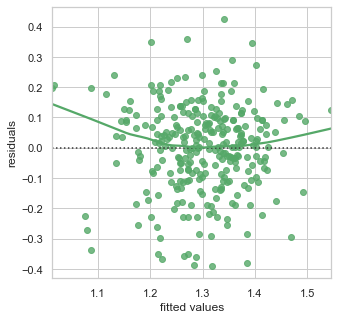

In [58]:
# Residual fit for training data
fig, ax = plt.subplots(figsize =(5,5))
sns.residplot(x=l1_cv_train_pred, y=out_attr - l1_cv_train_pred, lowess=True, color="g")
ax.set(ylabel='residuals',xlabel='fitted values')

[Text(0, 0.5, 'residuals'), Text(0.5, 0, 'fitted values')]

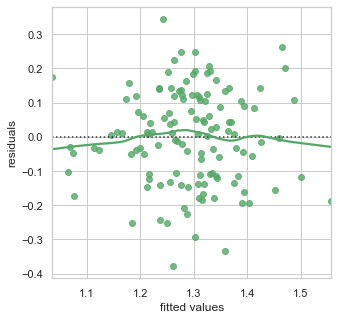

In [59]:
# Residual fit for testing data
fig, ax = plt.subplots(figsize =(5,5))
sns.residplot(x=l1_cv_test_pred, y=test_out_attr - l1_cv_test_pred, lowess=True, color="g")
ax.set(ylabel='residuals',xlabel='fitted values')

In [60]:
# Training target
out_attr

0      1.449507
1      1.391060
2      1.249667
3      1.363501
4      1.332839
5      1.394282
6      1.432170
7      1.200432
8      1.475908
9      0.895651
10     1.393454
11     1.221814
12     1.533756
13     1.247583
14     1.311756
15     1.239232
16     1.375805
17     1.433552
18     1.410949
19     1.446178
20     1.339747
21     1.540319
22     1.365868
23     1.310840
24     1.125378
25     1.454108
26     1.392241
27     1.348130
28     1.294687
29     1.466513
30     1.522665
31     1.278604
32     1.370979
33     1.362761
34     1.432885
35     1.158651
36     1.465929
37     1.231160
38     1.463391
39     1.324376
40     1.444853
41     1.426550
42     1.402675
43     1.170966
44     1.138994
45     1.220956
46     1.190602
47     1.378325
48     1.189955
49     1.209006
50     0.830990
51     1.099590
52     1.633399
53     1.276690
54     1.386482
55     1.137144
56     1.565165
57     1.106666
58     1.092891
59     1.335213
60     1.243984
61     1.453252
62     1

In [61]:
# Training predictions
l1_cv_train_pred

array([1.34163157, 1.30749218, 1.30276754, 1.20535269, 1.29160741,
       1.3704138 , 1.33374289, 1.15415902, 1.38122082, 1.26505432,
       1.33766669, 1.26561506, 1.40466475, 1.22668343, 1.31294794,
       1.15885636, 1.35651285, 1.39608421, 1.37335124, 1.36397394,
       1.32906197, 1.29942353, 1.3936842 , 1.33640861, 1.17738   ,
       1.33094336, 1.31129087, 1.36251716, 1.26735926, 1.35836585,
       1.33493954, 1.21352001, 1.28897592, 1.33865218, 1.32699678,
       1.22244691, 1.35840647, 1.21366863, 1.29868904, 1.27308655,
       1.29148507, 1.31567211, 1.23380337, 1.25776231, 1.01732128,
       1.30476057, 1.27998013, 1.30399312, 1.27170117, 1.25365367,
       1.22233399, 1.25182138, 1.44257817, 1.24679568, 1.41825371,
       1.26194882, 1.33871435, 1.32853128, 1.20573757, 1.40247418,
       1.2769683 , 1.39256874, 1.38395314, 1.32053254, 1.21955734,
       1.1451685 , 1.21279503, 1.29902385, 1.33892949, 1.19496613,
       1.36207685, 1.36476499, 1.38637306, 1.41329717, 1.17647

In [62]:
# Testing target
test_out_attr

0      1.346549
1      1.161361
2      1.141863
3      1.025546
4      1.291702
5      1.709703
6      1.335924
7      1.291506
8      1.229289
9      1.123577
10     1.273961
11     1.158850
12     1.464239
13     1.510113
14     0.904384
15     1.429809
16     1.209837
17     1.398050
18     1.300294
19     1.489520
20     1.440483
21     1.327487
22     1.265571
23     1.417989
24     1.563430
25     1.431201
26     1.121413
27     1.359423
28     1.375717
29     1.362942
30     1.232786
31     1.530398
32     1.082512
33     1.541685
34     1.130026
35     1.401971
36     1.018313
37     1.557178
38     1.611422
39     1.322397
40     1.228055
41     1.652238
42     1.189826
43     1.275544
44     0.959854
45     1.276445
46     1.265498
47     1.384178
48     1.186918
49     1.325621
50     1.345493
51     1.543634
52     1.507655
53     1.496420
54     1.407163
55     1.165029
56     0.966661
57     1.203165
58     1.346539
59     1.217160
60     1.192147
61     1.371767
62     1

In [63]:
# Testing predictions
l1_cv_test_pred

array([1.19231976, 1.31717909, 1.31503231, 1.35840538, 1.34717802,
       1.46564127, 1.32547484, 1.25905786, 1.39434236, 1.21709886,
       1.03617873, 1.28936447, 1.25135269, 1.36504833, 1.26137902,
       1.27559494, 1.31098665, 1.32855586, 1.19507679, 1.41235492,
       1.30701869, 1.30883344, 1.22225392, 1.27821763, 1.30220112,
       1.31253045, 1.23689325, 1.50061201, 1.34128356, 1.33204647,
       1.34180331, 1.33007336, 1.07406707, 1.2764007 , 1.12254157,
       1.42583228, 1.23791231, 1.42304485, 1.24218186, 1.24416933,
       1.33034576, 1.47045946, 1.31919253, 1.27896387, 1.07724786,
       1.31352125, 1.38304007, 1.29412872, 1.19257571, 1.26264808,
       1.37908493, 1.32894628, 1.30227828, 1.35873825, 1.27913725,
       1.3383231 , 1.184019  , 1.40252898, 1.40879744, 1.16691901,
       1.39023088, 1.31989912, 1.17327273, 1.37604351, 1.30939986,
       1.31400694, 1.23238527, 1.23537283, 1.36990881, 1.21801927,
       1.2968945 , 1.39318415, 1.39121931, 1.32435753, 1.14641

# PyCaret Best Model

In [64]:
#s = setup(preprocessed_df, target = 'ln_LR', fold_shuffle=True, train_size = 0.7, numeric_features= feat_columns, feature_selection = True, imputation_type='iterative')
s = setup(preprocessed_df, target = 'ln_LR', fold_shuffle=True, train_size = 0.7, numeric_features= preprocessed_df.columns.values.tolist()[:-1], feature_selection = True, imputation_type='iterative')

,Description,Value
0,session_id,7296
1,Target,ln_LR
2,Original Data,"(294, 137)"
3,Missing Values,False
4,Numeric Features,136
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(205, 135)"


AttributeError: 'Make_Time_Features' object has no attribute 'list_of_features'

In [65]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ada,AdaBoost Regressor,0.1315,0.0285,0.1675,0.0966,0.0753,0.1091,0.0350
omp,Orthogonal Matching Pursuit,0.1345,0.0290,0.1687,0.0870,0.0755,0.1106,0.0040
br,Bayesian Ridge,0.1317,0.0295,0.1702,0.0819,0.0763,0.1097,0.0060
rf,Random Forest Regressor,0.1372,0.0300,0.1716,0.0583,0.0771,0.1141,0.2140
catboost,CatBoost Regressor,0.1370,0.0305,0.1732,0.0371,0.0776,0.1138,2.5620
et,Extra Trees Regressor,0.1372,0.0318,0.1764,0.0184,0.0791,0.1142,0.1120
lightgbm,Light Gradient Boosting Machine,0.1407,0.0313,0.1751,0.0052,0.0783,0.1163,0.0670
en,Elastic Net,0.1408,0.0338,0.1825,-0.0475,0.0816,0.1173,0.0050
llar,Lasso Least Angle Regression,0.1408,0.0338,0.1825,-0.0475,0.0816,0.1173,0.0050
lasso,Lasso Regression,0.1408,0.0338,0.1825,-0.0475,0.0816,0.1173,0.0050


In [66]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [67]:
pred_test = predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,str,0.1351,0.0292,0.1710,0.0595,0.0748,0.1075


# PyCaret Ensemble Model

In [68]:
# train model
em = create_model('dt')

# ensemble model
boosted_em = ensemble_model(em, method = 'Boosting', optimize = 'R2', choose_better = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.1329,0.0253,0.1591,-0.0240,0.0688,0.1002
1,0.1292,0.0251,0.1586,0.2850,0.0722,0.1075
2,0.1297,0.0267,0.1635,-0.3586,0.0714,0.1049
3,0.1692,0.0449,0.2118,-0.3279,0.0928,0.1267
4,0.1546,0.0425,0.2061,0.0260,0.0934,0.1284
5,0.2010,0.0643,0.2536,-0.6404,0.1169,0.1865
6,0.1672,0.0395,0.1988,-0.0296,0.0880,0.1376
7,0.1515,0.0330,0.1817,-0.0422,0.0800,0.1205
8,0.1082,0.0203,0.1426,0.1453,0.0629,0.0880
9,0.1622,0.0426,0.2063,-0.3154,0.0966,0.1467


In [69]:
evaluate_model(boosted_em)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [70]:
ens_pred_test = predict_model(boosted_em)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,str,0.1309,0.0304,0.1742,0.0233,0.0763,0.1042


# Kaggle Predictions

In [71]:
# Portfolios for some reason missing from the zip file he gave us
missing_ports = [31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 
                 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 161, 162,
                 163, 164, 165, 166, 167, 168, 169, 170, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 271, 272, 273, 274,
                 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306,
                 307, 308, 309, 310, 321, 322, 323, 323, 324, 325, 326, 327, 328, 329, 330, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 361, 362, 363, 364, 365, 366, 367,
                368, 369, 370, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 471, 472, 473, 474, 475, 476, 477, 478, 479,
                480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 521,
                522, 523, 524, 525, 526, 527, 528, 529, 530, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 581, 582, 583,
                584, 585, 586, 587, 588, 589, 590]
port_list = []
for i in range(1, 601):
    if i not in missing_ports:
        port_list.append(i)

In [72]:
# Generate predictions for Kaggle

In [73]:
# Create empty dataframe with column names
port_feats = pd.DataFrame(columns=feat_columns)

In [74]:
# Create features from kaggle portfolios and combine them into one dataframe
PATH = './testing_portfolios/'
port_ids = []
for i in port_list:
    port_df = pd.read_csv(PATH+"test_portfolio_" + str(i) + '.csv')


    # Top num_brands most seen vehicle brands
    brands = port_df['Vehicle_Make_Description'].str.split(' ').str[0]   
    veh_brand = pd.get_dummies(brands)
    veh_brand = veh_brand.add_prefix('COUNT_')
    veh_brand_counts = {}
    for brand_name in brand_names:
        real_name = "COUNT_" + brand_name
        if real_name in veh_brand.columns.values:
            veh_brand_counts[real_name] = veh_brand[real_name].sum()
        else:
            veh_brand_counts[real_name] = 0
    
    

    # Top num_territories by vehicle count
    terrs = pd.get_dummies(port_df['Vehicle_Territory'], prefix='VEH_TERR', prefix_sep='_')
    veh_terr_counts = {}
    for terr in territories:
        real_name = "VEH_TERR_" + str(terr)
        if real_name in terrs.columns.values:
            veh_terr_counts[real_name] = terrs[real_name].sum()
        else:
            veh_terr_counts[real_name] = 0
    
    

    # Strip unnecessary white space from Vehicle Usage column
    port_df.Vehicle_Usage = port_df.Vehicle_Usage.str.rstrip()

    # For Binary Sum/Count Features
    veh_perf = pd.get_dummies(port_df['Vehicle_Performance'], prefix='VEH_PERF', prefix_sep='_')
    veh_usage = pd.get_dummies(port_df['Vehicle_Usage'], prefix='VEH_USAGE', prefix_sep='_')
    veh_atd = pd.get_dummies(port_df['Vehicle_Anti_Theft_Device'], prefix='VEH_ATD', prefix_sep='_')
    veh_pr = pd.get_dummies(port_df['Vehicle_Passive_Restraint'], prefix='VEH_PR', prefix_sep='_')
    veh_cci = pd.get_dummies(port_df['Vehicle_Comprehensive_Coverage_Indicator'], prefix='VEH_CCI', prefix_sep='_')
    veh_colci = pd.get_dummies(port_df['Vehicle_Collision_Coverage_Indicator'], prefix='VEH_COLCI', prefix_sep='_')
    veh_ydi = pd.get_dummies(port_df['Vehicle_Youthful_Driver_Indicator'], prefix='VEH_YDI', prefix_sep='_')
    veh_sddi = pd.get_dummies(port_df['Vehicle_Safe_Driver_Discount_Indicator'], prefix='VEH_SDDI', prefix_sep='_')
    pc = pd.get_dummies(port_df['Policy_Company'], prefix='PC', prefix_sep='_')
    pit = pd.get_dummies(port_df['Policy_Installment_Term'], prefix='PIT', prefix_sep='_')
    pbc = pd.get_dummies(port_df['Policy_Billing_Code'], prefix='PBC', prefix_sep='_')
    pmop = pd.get_dummies(port_df['Policy_Method_Of_Payment'], prefix='PMOP', prefix_sep='_')
    prfi = pd.get_dummies(port_df['Policy_Reinstatement_Fee_Indicator'], prefix='PRFI', prefix_sep='_')
    EEA_lcoi = pd.get_dummies(port_df['EEA_Liability_Coverage_Only_Indicator'], prefix='EEA_LCOI', prefix_sep='_')
    EEA_mapi = pd.get_dummies(port_df['EEA_Multi_Auto_Policies_Indicator'], prefix='EEA_MAPI', prefix_sep='_')
    EEA_ppi = pd.get_dummies(port_df['EEA_Packaged_Policy_Indicator'], prefix='EEA_PPI', prefix_sep='_')
    EEA_fci = pd.get_dummies(port_df['EEA_Full_Coverage_Indicator'], prefix='EEA_FCI', prefix_sep='_')
    
    veh_sddi_y = veh_sddi_n = veh_ydi_y = veh_ydi_n = veh_colci_y = veh_colci_n = veh_cci_y = veh_cci_n = EEA_fci_n = EEA_fci_y = EEA_ppi_y = EEA_ppi_n = EEA_mapi_n = EEA_mapi_y = EEA_lcoi_y = EEA_lcoi_n = prfi_n = prfi_y = pmop_pre = pmop_install = pbc_pf = pbc_dbi = pit_6 = pit_12 = pc_pref = pc_stand = veh_perf_high = veh_perf_intermediate = veh_perf_sports = veh_perf_sports_premium = veh_perf_standard = veh_usage_business = veh_usage_pleasure = veh_usage_farm = veh_usage_work = veh_atd_active  = veh_atd_alarm = veh_atd_na = veh_atd_pdvr = veh_atd_unknown = veh_pr_y = veh_pr_n = veh_pr_unknown = 0
    
    if 'VEH_PERF_High' in veh_perf.columns: veh_perf_high = veh_perf['VEH_PERF_High'].sum()
    if 'VEH_PERF_Intermediate' in veh_perf.columns: veh_perf_intermediate = veh_perf['VEH_PERF_Intermediate'].sum()
    if 'VEH_PERF_Sports' in veh_perf.columns: veh_perf_sports = veh_perf['VEH_PERF_Sports'].sum()
    if 'VEH_PERF_Sports Premium' in veh_perf.columns: veh_perf_sports_premium = veh_perf['VEH_PERF_Sports Premium'].sum()
    if 'VEH_PERF_Standard' in veh_perf.columns: veh_perf_standard = veh_perf['VEH_PERF_Standard'].sum()
    if 'VEH_USAGE_Business' in veh_usage.columns: veh_usage_business = veh_usage['VEH_USAGE_Business'].sum()
    if 'VEH_USAGE_Pleasure' in veh_usage.columns: veh_usage_pleasure = veh_usage['VEH_USAGE_Pleasure'].sum()
    if 'VEH_USAGE_Farm' in veh_usage.columns: veh_usage_farm = veh_usage['VEH_USAGE_Farm'].sum()
    if 'VEH_USAGE_Work' in veh_usage.columns: veh_usage_work = veh_usage['VEH_USAGE_Work'].sum()
    if 'VEH_ATD_Active Disabling' in veh_atd.columns: veh_atd_active = veh_atd['VEH_ATD_Active Disabling'].sum()
    if 'VEH_ATD_Alarm Only' in veh_atd.columns: veh_atd_alarm = veh_atd['VEH_ATD_Alarm Only'].sum()
    if 'VEH_ATD_Not Applicable' in veh_atd.columns: veh_atd_na = veh_atd['VEH_ATD_Not Applicable'].sum()
    if 'VEH_ATD_Passive Disabling-Vehicle Recovery' in veh_atd.columns: veh_atd_pdvr = veh_atd['VEH_ATD_Passive Disabling-Vehicle Recovery'].sum()
    if 'VEH_ATD_Unknown' in veh_atd.columns: veh_atd_unknown = veh_atd['VEH_ATD_Unknown'].sum()
    if 'VEH_PR_Y' in veh_pr.columns: veh_pr_y = veh_pr['VEH_PR_Y'].sum()
    if 'VEH_PR_N' in veh_pr.columns: veh_pr_n = veh_pr['VEH_PR_N'].sum()
    if 'VEH_CCI_Y' in veh_cci.columns: veh_cci_y = veh_cci['VEH_CCI_Y'].sum()
    if 'VEH_CCI_N' in veh_cci.columns: veh_cci_n = veh_cci['VEH_CCI_N'].sum()
    if 'VEH_COLCI_Y' in veh_colci.columns: veh_colci_y = veh_colci['VEH_COLCI_Y'].sum()
    if 'VEH_COLCI_N' in veh_colci.columns: veh_colci_n = veh_colci['VEH_COLCI_N'].sum()
    if 'VEH_YDI_Y' in veh_ydi.columns: veh_ydi_y = veh_ydi['VEH_YDI_Y'].sum()
    if 'VEH_YDI_N' in veh_ydi.columns: veh_ydi_n = veh_ydi['VEH_YDI_N'].sum()
    if 'VEH_SDDI_Y' in veh_sddi.columns: veh_sddi_y = veh_sddi['VEH_SDDI_Y'].sum()
    if 'VEH_SDDI_N' in veh_sddi.columns: veh_sddi_n = veh_sddi['VEH_SDDI_N'].sum()
    if 'VEH_PR_Unknown' in veh_pr.columns: veh_pr_unknown = veh_pr['VEH_PR_Unknown'].sum()
    if 'PC_Standard' in pc.columns: pc_stand = pc['PC_Standard'].sum()
    if 'PC_Preferred' in pc.columns: pc_pref = pc['PC_Preferred'].sum()
    if 'PIT_6' in pit.columns: pit_6 = pit['PIT_6'].sum()
    if 'PIT_12' in pit.columns: pit_12 = pit['PIT_12'].sum()
    if 'PBC_Direct Billed to Insured' in pbc.columns: pbc_dbi = pbc['PBC_Direct Billed to Insured'].sum()
    if 'PBC_Premium Finance' in pbc.columns: pbc_pf = pbc['PBC_Premium Finance'].sum()
    if 'PMOP_Pre-paid' in pmop.columns: pmop_pre = pmop['PMOP_Pre-paid'].sum()
    if 'PMOP_Installment' in pmop.columns: pmop_install = pmop['PMOP_Installment'].sum()
    if 'PRFI_N' in prfi.columns: prfi_n = prfi['PRFI_N'].sum()
    if 'PRFI_Y' in prfi.columns: prfi_y = prfi['PRFI_Y'].sum()
    if 'EEA_LCOI_N' in EEA_lcoi.columns: EEA_lcoi_n = EEA_lcoi['EEA_LCOI_N'].sum()
    if 'EEA_LCOI_Y' in EEA_lcoi.columns: EEA_lcoi_y = EEA_lcoi['EEA_LCOI_Y'].sum()
    if 'EEA_MAPI_N' in EEA_mapi.columns: EEA_mapi_n = EEA_mapi['EEA_MAPI_N'].sum()
    if 'EEA_MAPI_Y' in EEA_mapi.columns: EEA_mapi_y = EEA_mapi['EEA_MAPI_Y'].sum()
    if 'EEA_PPI_N' in EEA_ppi.columns: EEA_ppi_n = EEA_ppi['EEA_PPI_N'].sum()
    if 'EEA_PPI_Y' in EEA_ppi.columns: EEA_ppi_y = EEA_ppi['EEA_PPI_Y'].sum()
    if 'EEA_FCI_N' in EEA_fci.columns: EEA_fci_n = EEA_fci['EEA_FCI_N'].sum()
    if 'EEA_FCI_Y' in EEA_fci.columns: EEA_fci_y = EEA_fci['EEA_FCI_Y'].sum()
        
        
    # For Mean, STD, and Quartile features (and some driver count by age features)
    driver_trtis_mean = port_df['Driver_Total_Related_To_Insured_Self'].mean()
    driver_trtis_std = port_df['Driver_Total_Related_To_Insured_Self'].std()
    veh_ccd_mean = port_df['Vehicle_Collision_Coverage_Deductible'].mean()
    veh_ccd_std = port_df['Vehicle_Collision_Coverage_Deductible'].std()
    veh_ccl_mean = port_df['Vehicle_Comprehensive_Coverage_Limit'].mean()
    veh_ccl_std = port_df['Vehicle_Comprehensive_Coverage_Limit'].std()
    veh_mtw_mean = port_df['Vehicle_Miles_To_Work'].mean()
    veh_mtw_std = port_df['Vehicle_Miles_To_Work'].std()
    veh_nca_mean = port_df['Vehicle_New_Cost_Amount'].mean()
    veh_nca_std = port_df['Vehicle_New_Cost_Amount'].std()
    veh_driver_points_mean = port_df['Vehicle_Driver_Points'].mean()
    veh_driver_points_std = port_df['Vehicle_Driver_Points'].std()
    driver_total_mean = port_df['Driver_Total'].mean()
    driver_total_std = port_df['Driver_Total'].std()
    driver_total_male_mean = port_df['Driver_Total_Male'].mean()
    driver_total_male_std = port_df['Driver_Total_Male'].std()
    driver_total_female_mean = port_df['Driver_Total_Female'].mean()
    driver_total_female_std = port_df['Driver_Total_Female'].std()
    driver_total_young = port_df['Driver_Total_Teenager_Age_15_19'].sum() + port_df['Driver_Total_College_Ages_20_23'].sum()
    driver_total_young_adult = port_df['Driver_Total_Young_Adult_Ages_24_29'].sum() + port_df['Driver_Total_Low_Middle_Adult_Ages_30_39'].sum()
    driver_total_old_adult = port_df['Driver_Total_Middle_Adult_Ages_40_49'].sum() + port_df['Driver_Total_Adult_Ages_50_64'].sum()
    driver_total_senior = port_df['Driver_Total_Senior_Ages_65_69'].sum() + port_df['Driver_Total_Upper_Senior_Ages_70_plus'].sum()
    veh_phys_damage_lim_mean = port_df['Vehicle_Physical_Damage_Limit'].mean()
    veh_phys_damage_lim_std = port_df['Vehicle_Physical_Damage_Limit'].std()
    veh_med_pay_lim_mean = port_df['Vehicle_Med_Pay_Limit'].mean()
    veh_med_pay_lim_std = port_df['Vehicle_Med_Pay_Limit'].std()
    dma_mean = port_df['Driver_Minimum_Age'].mean()
    dma_std = port_df['Driver_Minimum_Age'].std()
    dma_quar1 = port_df['Driver_Minimum_Age'].quantile(0.25)
    dma_quar2 = port_df['Driver_Minimum_Age'].quantile(0.50)
    dma_quar3 = port_df['Driver_Minimum_Age'].quantile(0.75)
    dmxa_mean = port_df['Driver_Maximum_Age'].mean()
    dmxa_std = port_df['Driver_Maximum_Age'].std()
    dmxa_quar1 = port_df['Driver_Maximum_Age'].quantile(0.25)
    dmxa_quar2 = port_df['Driver_Maximum_Age'].quantile(0.50)
    dmxa_quar3 = port_df['Driver_Maximum_Age'].quantile(0.75)
    vay_mean = port_df['Vehicle_Age_In_Years'].mean()
    vay_std = port_df['Vehicle_Age_In_Years'].std()
    ap_mean = port_df['Annual_Premium'].mean()
    ap_std = port_df['Annual_Premium'].std()
    ap_quar1 = port_df['Annual_Premium'].quantile(0.25)
    ap_quar2 = port_df['Annual_Premium'].quantile(0.50)
    ap_quar3 = port_df['Annual_Premium'].quantile(0.75)
    vmy_mean = port_df['Vehicle_Make_Year'].mean()
    vmy_std = port_df['Vehicle_Make_Year'].std()
    vmy_quar1 = port_df['Vehicle_Make_Year'].quantile(0.25)
    vmy_quar2 = port_df['Vehicle_Make_Year'].quantile(0.50)
    vmy_quar3 = port_df['Vehicle_Make_Year'].quantile(0.75)

    port_data = {'DMA_MEAN': dma_mean, 'DMA_STD': dma_std, 'DMA_QUAR1': dma_quar1, 'DMA_QUAR2': dma_quar2, 
            'DMA_QUAR3': dma_quar3, 'VAY_MEAN': vay_mean, 'VAY_STD': vay_std, 'AP_MEAN': ap_mean, 
            'AP_STD': ap_std, 'AP_QUAR1': ap_quar1, 'AP_QUAR2': ap_quar2, 'AP_QUAR3': ap_quar3, 
            'VEH_PERF_HIGH': veh_perf_high, 'VEH_PERF_INTERMEDIATE': veh_perf_intermediate,
            'VEH_PERF_SPORTS': veh_perf_sports, 'VEH_PERF_SPORTS_PREMIUM': veh_perf_sports_premium, 
            'VEH_PERF_STANDARD': veh_perf_standard, 'VMY_MEAN': vmy_mean, 'VMY_STD': vmy_std, 'VMY_QUAR1': vmy_quar1,
            'VMY_QUAR2': vmy_quar2, 'VMY_QUAR3': vmy_quar3, 'VEH_USAGE_BUSINESS': veh_usage_business, 
            'VEH_USAGE_PLEASURE': veh_usage_pleasure, 'VEH_USAGE_FARM': veh_usage_farm, 'VEH_USAGE_WORK': veh_usage_work, 
            'VEH_ATD_ACTIVE': veh_atd_active, 'VEH_ATD_ALARM': veh_atd_alarm, 'VEH_ATD_NA': veh_atd_na, 
            'VEH_ATD_PDVR': veh_atd_pdvr, 'VEH_ATD_UNKNOWN': veh_atd_unknown, 'VEH_PR_Y': veh_pr_y, 
            'VEH_PR_N': veh_pr_n, 'VEH_PR_UNKNOWN': veh_pr_unknown, 'VEH_MED_PAY_LIM_MEAN': veh_med_pay_lim_mean, 
            'VEH_MED_PAY_LIM_STD': veh_med_pay_lim_std, 'VEH_PHYS_DAMAGE_LIM_MEAN': veh_phys_damage_lim_mean,
            'VEH_PHYS_DAMAGE_LIM_STD': veh_phys_damage_lim_std, 'VEH_CCI_Y': veh_cci_y, 'VEH_CCI_N': veh_cci_n,
            'VEH_COLCI_Y': veh_colci_y, 'VEH_COLCI_N': veh_colci_n, 'DRIVER_TOTAL_MEAN': driver_total_mean,
            'DRIVER_TOTAL_STD': driver_total_std, 'DRIVER_TOTAL_MALE_MEAN': driver_total_male_mean, 
            'DRIVER_TOTAL_MALE_STD': driver_total_male_std, 'DRIVER_TOTAL_FEMALE_MEAN': driver_total_female_mean, 
            'DRIVER_TOTAL_FEMALE_STD': driver_total_female_std, 'DMXA_MEAN': dmxa_mean, 'DMXA_STD': dmxa_std, 
            'DMXA_QUAR1': dmxa_quar1, 'DMXA_QUAR2': dmxa_quar2, 'DMXA_QUAR3': dmxa_quar3, 'DRIVER_TOTAL_YOUNG': driver_total_young, 
            'DRIVER_TOTAL_YOUNG_ADULT': driver_total_young_adult, 'DRIVER_TOTAL_OLD_ADULT': driver_total_old_adult, 
            'DRIVER_TOTAL_SENIOR': driver_total_senior, 'VEH_YDI_Y': veh_ydi_y, 'VEH_YDI_N': veh_ydi_n,
            'VEH_DRIVER_POINTS_MEAN': veh_driver_points_mean, 'VEH_DRIVER_POINTS_STD': veh_driver_points_std, 
            'VEH_SSDI_Y': veh_sddi_y, 'VEH_SDDI_N': veh_sddi_n, 'PC_STAND': pc_stand, 'PC_PREF': pc_pref, 'PIT_6': pit_6, 
            'PIT_12': pit_12, 'PBC_DBI' : pbc_dbi, 'PBC_PF': pbc_pf, 'PMOP_PRE': pmop_pre, 'PMOP_INSTALL': pmop_install, 
            'PRFI_N': prfi_n, 'PRFI_Y': prfi_y, 'VEH_NCA_MEAN': veh_nca_mean, 'VEH_NCA_STD': veh_nca_std, 
            'VEH_MTW_MEAN': veh_mtw_mean, 'VEH_MTW_STD': veh_mtw_std, 'VEH_CCL_MEAN': veh_ccl_mean, 'VEH_CCL_STD': veh_ccl_std, 
            'VEH_CCD_MEAN': veh_ccd_mean, 'VEH_CCD_STD': veh_ccd_std, 'DRIV_TRTIS_MEAN': driver_trtis_mean, 
            'DRIV_TRTIS_STD': driver_trtis_std, 'EEA_LCOI_N': EEA_lcoi_n, 'EEA_LCOI_Y': EEA_lcoi_y, 'EEA_MAPI_N': EEA_mapi_n, 
            'EEA_MAPI_Y': EEA_mapi_y, 'EEA_PPI_N': EEA_ppi_n, 'EEA_PPI_Y': EEA_ppi_y, 'EEA_FCI_N': EEA_fci_n, 
            'EEA_FCI_Y': EEA_fci_y}


    p_feats = veh_brand_counts
    p_feats.update(veh_terr_counts)
    p_feats.update(port_data)
    port_data_df = pd.DataFrame(p_feats, [i])
    port_feats = pd.concat([port_feats, port_data_df], ignore_index=True)
    port_ids.append('portfolio_' + str(i))

In [75]:
# Kaggle portfolios
port_feats.head(5)

,COUNT_FORD,COUNT_CHEV,COUNT_TYTA,COUNT_DODG,COUNT_HOND,COUNT_NSSN,COUNT_GMC,COUNT_JEEP,COUNT_PONT,COUNT_BUIK,...,DRIV_TRTIS_MEAN,DRIV_TRTIS_STD,EEA_LCOI_N,EEA_LCOI_Y,EEA_MAPI_N,EEA_MAPI_Y,EEA_PPI_N,EEA_PPI_Y,EEA_FCI_N,EEA_FCI_Y
0,250,183,69,75,50,52,40,33,26,20,...,0.785000,0.420657,729,271,96,904,503,497,394,606
1,248,192,76,59,61,48,38,31,33,26,...,0.804805,0.399068,717,282,115,884,540,459,412,587
2,238,235,62,59,46,39,40,37,28,21,...,0.780000,0.414454,717,283,121,879,544,456,389,611
3,234,196,64,79,49,45,45,38,28,33,...,0.768305,0.424499,740,257,108,889,507,490,370,627
4,217,207,80,61,43,54,30,37,37,29,...,0.767535,0.429677,720,278,137,861,561,437,377,621


In [76]:
# Scaling portfolio features
scaled_port_feats = scaler.transform(port_feats.values)
scaled_port_feats = pd.DataFrame(scaled_port_feats, index=port_feats.index, columns=port_feats.columns)

In [77]:
# Standardized features
port_feats

,COUNT_FORD,COUNT_CHEV,COUNT_TYTA,COUNT_DODG,COUNT_HOND,COUNT_NSSN,COUNT_GMC,COUNT_JEEP,COUNT_PONT,COUNT_BUIK,...,DRIV_TRTIS_MEAN,DRIV_TRTIS_STD,EEA_LCOI_N,EEA_LCOI_Y,EEA_MAPI_N,EEA_MAPI_Y,EEA_PPI_N,EEA_PPI_Y,EEA_FCI_N,EEA_FCI_Y
0,250,183,69,75,50,52,40,33,26,20,...,0.785000,0.420657,729,271,96,904,503,497,394,606
1,248,192,76,59,61,48,38,31,33,26,...,0.804805,0.399068,717,282,115,884,540,459,412,587
2,238,235,62,59,46,39,40,37,28,21,...,0.780000,0.414454,717,283,121,879,544,456,389,611
3,234,196,64,79,49,45,45,38,28,33,...,0.768305,0.424499,740,257,108,889,507,490,370,627
4,217,207,80,61,43,54,30,37,37,29,...,0.767535,0.429677,720,278,137,861,561,437,377,621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,1121,1082,348,325,279,233,203,164,119,136,...,0.771873,0.421589,3684,1265,604,4345,2563,2386,1799,3150
326,1164,1043,357,323,269,221,201,154,154,141,...,0.761761,0.428413,3717,1236,583,4370,2538,2415,1769,3184
327,1121,1046,365,336,265,246,176,150,133,123,...,0.773371,0.421583,3670,1272,622,4320,2652,2290,1791,3151
328,1135,1010,416,320,277,246,184,148,141,137,...,0.765906,0.424903,3702,1249,585,4366,2600,2351,1783,3168


In [ ]:
# If using PCA
#port_feats = pd.DataFrame(pca.transform(port_feats))

In [ ]:
# PCA Features
#port_feats

In [94]:
# Making predictions on the kaggle data using XGBoost Random Forest Regressor
#port_feats_xg = xgb.DMatrix(port_feats.astype(float))
#predictions = bst.predict(port_feats_xg)

In [95]:
# Making predictions on the kaggle data using L1 CV
#predictions = l1_cv.predict(port_feats)

In [101]:
# Making predictions on the kaggle data using PyCaret Best Model
#predictions = predict_model(best, data = port_feats).Label

In [104]:
# Making predictions on the kaggle data using PyCaret Ensemble Model
predictions = predict_model(boosted_em, data = port_feats).Label

In [105]:
# Kaggle natural log loss ratio predictions
predictions

0      1.024259
1      1.024259
2      1.024259
3      1.024259
4      1.024259
         ...   
325    1.024259
326    1.024259
327    1.024259
328    1.024259
329    1.024259
Name: Label, Length: 330, dtype: float64

In [106]:
# Preparing for submission to kaggle
port_predictions = pd.DataFrame({'ID': port_ids, 'ln_LR': predictions})

In [107]:
# Ready for submission
port_predictions

,ID,ln_LR
0,portfolio_1,1.024259
1,portfolio_2,1.024259
2,portfolio_3,1.024259
3,portfolio_4,1.024259
4,portfolio_5,1.024259
...,...,...
325,portfolio_596,1.024259
326,portfolio_597,1.024259
327,portfolio_598,1.024259
328,portfolio_599,1.024259


In [108]:
# Write to CSV file
port_predictions.to_csv('kaggle_predictions.csv', index=False)